<a href="https://colab.research.google.com/github/SAM8402/BDM-Project/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### BIG BASKET DATA ANALYSIS

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Reading the data file

In [ ]:
df = pd.read_csv("BigBasket Products.csv")
df = df.set_index('index')

In [ ]:
df['Discount'] = (
    (df.market_price - df.sale_price)/df.market_price)*100
# Ensure discount is properly formatted as a percentage
df['Discount'] = df['Discount'].round(
    2)  # Round to 2 decimal places

In [ ]:
df.head()

product  \
index                                                      
1                 Garlic Oil - Vegetarian Capsule 500 mg   
2                                  Water Bottle - Orange   
3                         Brass Angle Deep - Plain, No.2   
4      Cereal Flip Lid Container/Storage Jar - Assort...   
5                     Creme Soft Soap - For Hands & Body   

                     category           sub_category              brand  \
index                                                                     
1            Beauty & Hygiene              Hair Care  Sri Sri Ayurveda    
2      Kitchen, Garden & Pets  Storage & Accessories         Mastercook   
3        Cleaning & Household            Pooja Needs                Trm   
4        Cleaning & Household   Bins & Bathroom Ware             Nakoda   
5            Beauty & Hygiene       Bath & Hand Wash              Nivea   

       sale_price  market_price                      type  rating  \
index                                                               
1           220.0         220.0          Hair Oil & Serum     4.1   
2           180.0         180.0    Water & Fridge Bottles     2.3   
3           119.0         250.0           Lamp & Lamp Oil     3.4   
4           149.0         176.0  Laundry, Storage Baskets     3.7   
5           162.0         162.0      Bathing Bars & Soaps     4.4   

                                             description  Discount  
index                                                               
1      This Product contains Garlic Oil that is known...      0.00  
2      Each product is microwave safe (without lid), ...      0.00  
3      A perfect gift for all occasions, be it your m...     52.40  
4      Multipurpose container with an attractive desi...     15.34  
5      Nivea Creme Soft Soap gives your skin the best...      0.00

### Analysing the df by describe, info command and checking null values

In [ ]:
df.shape

(27555, 10)

In [ ]:
df.describe().round(2)

sale_price  market_price    rating  Discount
count    27555.00      27555.00  18929.00  27555.00
mean       322.51        382.06      3.94     11.82
std        486.26        581.73      0.74     14.62
min          2.45          3.00      1.00      0.00
25%         95.00        100.00      3.70      0.00
50%        190.00        220.00      4.10      5.00
75%        359.00        425.00      4.30     20.00
max      12500.00      12500.00      5.00     83.67

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27555 entries, 1 to 27555
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product       27554 non-null  object 
 1   category      27555 non-null  object 
 2   sub_category  27555 non-null  object 
 3   brand         27554 non-null  object 
 4   sale_price    27555 non-null  float64
 5   market_price  27555 non-null  float64
 6   type          27555 non-null  object 
 7   rating        18929 non-null  float64
 8   description   27440 non-null  object 
 9   Discount      27555 non-null  float64
dtypes: float64(4), object(6)
memory usage: 2.3+ MB


In [ ]:
df.isnull().sum()

product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8626
description      115
Discount           0
dtype: int64

## Performing Outlier treatment in rating column

<Axes: xlabel='rating'>

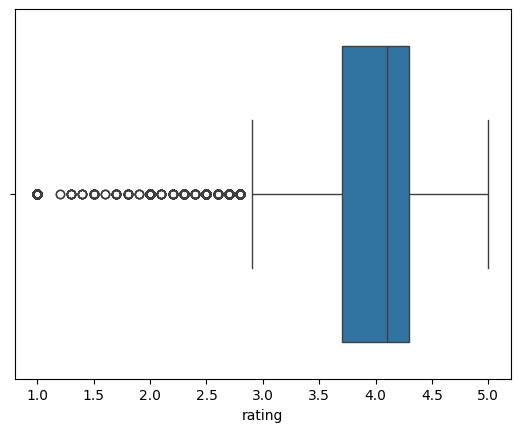

In [ ]:
sns.boxplot(x=df.rating)

In [ ]:
df["rating"].mean()

np.float64(3.943409583179249)

In [ ]:
df['category'].unique()

array(['Beauty & Hygiene', 'Kitchen, Garden & Pets',
       'Cleaning & Household', 'Gourmet & World Food',
       'Foodgrains, Oil & Masala', 'Snacks & Branded Foods', 'Beverages',
       'Bakery, Cakes & Dairy', 'Baby Care', 'Fruits & Vegetables',
       'Eggs, Meat & Fish'], dtype=object)

In [ ]:
df['category'].nunique()

11

In [ ]:
df['category'].value_counts()

category
Beauty & Hygiene            7867
Gourmet & World Food        4690
Kitchen, Garden & Pets      3580
Snacks & Branded Foods      2814
Foodgrains, Oil & Masala    2676
Cleaning & Household        2675
Beverages                    885
Bakery, Cakes & Dairy        851
Baby Care                    610
Fruits & Vegetables          557
Eggs, Meat & Fish            350
Name: count, dtype: int64

In [ ]:
df['sub_category'].nunique()

90

In [ ]:
df['sub_category'].value_counts()

sub_category
Skin Care                   2294
Health & Medicine           1133
Hair Care                   1028
Storage & Accessories       1015
Fragrances & Deos           1000
                            ... 
Mutton & Lamb                 20
Water                         17
Flower Bouquets, Bunches       8
Pork & Other Meats             5
Marinades                      1
Name: count, Length: 90, dtype: int64

In [ ]:
df['brand'].nunique()

2313

In [ ]:
df['brand'].value_counts()

brand
Fresho              638
bb Royal            539
BB Home             428
DP                  250
Fresho Signature    171
                   ... 
Sanitt                1
Fazlani               1
Fakira                1
Sofia                 1
Tez                   1
Name: count, Length: 2313, dtype: int64

In [ ]:
df["rating"] = df.groupby("category")["rating"].transform(lambda x: x.fillna(round(x.mean(), 2))).fillna(df["rating"].mean().round(2))

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

product         0
category        0
sub_category    0
brand           0
sale_price      0
market_price    0
type            0
rating          0
description     0
Discount        0
dtype: int64

In [ ]:
df.shape

(27439, 10)

In [ ]:
df.head()

product  \
index                                                      
1                 Garlic Oil - Vegetarian Capsule 500 mg   
2                                  Water Bottle - Orange   
3                         Brass Angle Deep - Plain, No.2   
4      Cereal Flip Lid Container/Storage Jar - Assort...   
5                     Creme Soft Soap - For Hands & Body   

                     category           sub_category              brand  \
index                                                                     
1            Beauty & Hygiene              Hair Care  Sri Sri Ayurveda    
2      Kitchen, Garden & Pets  Storage & Accessories         Mastercook   
3        Cleaning & Household            Pooja Needs                Trm   
4        Cleaning & Household   Bins & Bathroom Ware             Nakoda   
5            Beauty & Hygiene       Bath & Hand Wash              Nivea   

       sale_price  market_price                      type  rating  \
index                                                               
1           220.0         220.0          Hair Oil & Serum     4.1   
2           180.0         180.0    Water & Fridge Bottles     2.3   
3           119.0         250.0           Lamp & Lamp Oil     3.4   
4           149.0         176.0  Laundry, Storage Baskets     3.7   
5           162.0         162.0      Bathing Bars & Soaps     4.4   

                                             description  Discount  
index                                                               
1      This Product contains Garlic Oil that is known...      0.00  
2      Each product is microwave safe (without lid), ...      0.00  
3      A perfect gift for all occasions, be it your m...     52.40  
4      Multipurpose container with an attractive desi...     15.34  
5      Nivea Creme Soft Soap gives your skin the best...      0.00

In [ ]:
df['product'].nunique()

# Cleaning

### Product Column

In [ ]:
product_value =df["product"].value_counts()
product_value

product
Turmeric Powder/Arisina Pudi                                      26
Extra Virgin Olive Oil                                            15
Cow Ghee/Tuppa                                                    13
Olive Oil - Extra Virgin                                          12
Colorsilk Hair Colour With Keratin                                12
                                                                  ..
Lather Shaving Cream - Denim                                       1
Omega Deluxe Non-Stick BYK Cookware Set, Maroon (30747/307472)     1
Fields Of Gold - Organic Sunflower Oil                             1
Cracker - Wheat                                                    1
Butter - Cashew, Smooth                                            1
Name: count, Length: 23449, dtype: int64

In [ ]:
product_lessthan_4 = product_value[product_value<4]
product_lessthan_4

product
Natural Jaggery/Bella Powder                                      3
Happy Moisturising Hand Wash - Grapefruit & Bergamot              3
Organic Besan/Kadale Hittu                                        3
Organics Hair Oil - Karippan Thailam                              3
Sesame Oil                                                        3
                                                                 ..
Lather Shaving Cream - Denim                                      1
Omega Deluxe Non-Stick BYK Cookware Set, Maroon (30747/307472)    1
Fields Of Gold - Organic Sunflower Oil                            1
Cracker - Wheat                                                   1
Butter - Cashew, Smooth                                           1
Name: count, Length: 23228, dtype: int64

In [ ]:
def mode_product(value):
    if (value in product_lessthan_4):
        return "Others"
    else:
        return value

df["product"] = df["product"].apply(mode_product)
p=df["product"].value_counts()

### Category Column

In [ ]:
category_value =df["category"].value_counts()
category_value

category
Beauty & Hygiene            7856
Gourmet & World Food        4647
Kitchen, Garden & Pets      3562
Snacks & Branded Foods      2813
Cleaning & Household        2665
Foodgrains, Oil & Masala    2655
Beverages                    881
Bakery, Cakes & Dairy        851
Baby Care                    609
Fruits & Vegetables          556
Eggs, Meat & Fish            344
Name: count, dtype: int64

### Sub-Category Column

In [ ]:
sub_category_value =df["sub_category"].value_counts()
sub_category_value

sub_category
Skin Care                   2291
Health & Medicine           1133
Hair Care                   1027
Storage & Accessories       1013
Fragrances & Deos           1000
                            ... 
Mutton & Lamb                 20
Water                         17
Flower Bouquets, Bunches       8
Pork & Other Meats             5
Marinades                      1
Name: count, Length: 90, dtype: int64

In [ ]:
sub_category_lessthan_300 = sub_category_value[sub_category_value<300]
sub_category_lessthan_300

sub_category
Feminine Hygiene            285
Fresheners & Repellents     276
Chocolates & Candies        274
Oral Care                   270
Detergents & Dishwash       261
                           ... 
Mutton & Lamb                20
Water                        17
Flower Bouquets, Bunches      8
Pork & Other Meats            5
Marinades                     1
Name: count, Length: 61, dtype: int64

In [ ]:
def mode_sub_cat(value):
    if (value in sub_category_lessthan_300):
        return "Others"
    else:
        return value

df["sub_category"] = df["sub_category"].apply(mode_sub_cat)
sub_cat =df["sub_category"].value_counts()

### Brand Column

In [ ]:
brand_value =df["brand"].value_counts()
brand_value

brand
Fresho                 637
bb Royal               539
BB Home                427
DP                     250
Fresho Signature       171
                      ... 
Omino Bianco             1
109°F                    1
National Gardens         1
Dhishoom                 1
Amrutanjan Fruitnik      1
Name: count, Length: 2309, dtype: int64

In [ ]:
brand_lessthan_50 = brand_value[brand_value< 50]
brand_lessthan_50

brand
Fackelmann             49
By Nature              49
Cornitos               49
Sirona                 49
Tata Sampann           48
                       ..
Omino Bianco            1
109°F                   1
National Gardens        1
Dhishoom                1
Amrutanjan Fruitnik     1
Name: count, Length: 2205, dtype: int64

In [ ]:
def modebrand(value):
    if (value in brand_lessthan_50):
        return "Others"
    else:
        return value

df["brand"] = df["brand"].apply(modebrand)
b= df["brand"].value_counts()

### Type Column

In [ ]:
type_value =df["type"].value_counts()
type_value

type
Face Care                1506
Ayurveda                  538
Men's Deodorants          500
Shampoo & Conditioner     461
Glassware                 415
                         ... 
Bagels & Baguette           1
Roses                       1
Prawns & Shrimps            1
Specialty                   1
Turkey & Duck               1
Name: count, Length: 426, dtype: int64

In [ ]:
type_lessthan_20 = type_value[type_value< 20]
type_lessthan_20

type
Cocktail Mixes               19
Talc                         19
Milk & Soya Drinks           19
Attar                        19
Aluminium Foil, Clingwrap    19
                             ..
Bagels & Baguette             1
Roses                         1
Prawns & Shrimps              1
Specialty                     1
Turkey & Duck                 1
Name: count, Length: 149, dtype: int64

In [ ]:
def mode_type(value):
    if (value in type_lessthan_20):
        return "Others"
    else:
        return value

df["type"] = df["type"].apply(mode_type)
T = df["type"].value_counts()

### Checking Values in Sales Price and Market Price columns

In [ ]:
df.sale_price.unique()

array([ 220.  ,  180.  ,  119.  , ...,  522.78, 4500.  , 1525.75])

In [ ]:
df.market_price.unique()

array([ 220.,  180.,  250., ...,  622.,  636., 1071.])

In [ ]:
columns_to_clean = ['brand','type', 'product','sub_category','category','description']

# Strip leading and trailing spaces
for col in columns_to_clean:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27439 entries, 1 to 27555
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product       27439 non-null  object 
 1   category      27439 non-null  object 
 2   sub_category  27439 non-null  object 
 3   brand         27439 non-null  object 
 4   sale_price    27439 non-null  float64
 5   market_price  27439 non-null  float64
 6   type          27439 non-null  object 
 7   rating        27439 non-null  float64
 8   description   27439 non-null  object 
 9   Discount      27439 non-null  float64
dtypes: float64(4), object(6)
memory usage: 2.3+ MB


### Saving the cleaned data

In [ ]:
df.to_csv("BigBasket_Cleaned_Data.csv", index = False)

# Visualization

In [ ]:
df = pd.read_csv("BigBasket_Cleaned_Data.csv")

In [ ]:
df.head()

product                category           sub_category       brand  \
0  Others        Beauty & Hygiene              Hair Care      Others   
1  Others  Kitchen, Garden & Pets  Storage & Accessories  Mastercook   
2  Others    Cleaning & Household                 Others      Others   
3  Others    Cleaning & Household   Bins & Bathroom Ware      Nakoda   
4  Others        Beauty & Hygiene       Bath & Hand Wash       Nivea   

   sale_price  market_price                      type  rating  \
0       220.0         220.0          Hair Oil & Serum     4.1   
1       180.0         180.0    Water & Fridge Bottles     2.3   
2       119.0         250.0           Lamp & Lamp Oil     3.4   
3       149.0         176.0  Laundry, Storage Baskets     3.7   
4       162.0         162.0      Bathing Bars & Soaps     4.4   

                                         description  Discount  
0  This Product contains Garlic Oil that is known...      0.00  
1  Each product is microwave safe (without lid), ...      0.00  
2  A perfect gift for all occasions, be it your m...     52.40  
3  Multipurpose container with an attractive desi...     15.34  
4  Nivea Creme Soft Soap gives your skin the best...      0.00

In [ ]:
Product = p.iloc[1: ]
Sub_category = sub_cat.iloc[1: ]
Brand = b.iloc[1: ]
Type = T.iloc[1: ]

In [ ]:
df["Discount"].mean()

np.float64(11.833442545282264)

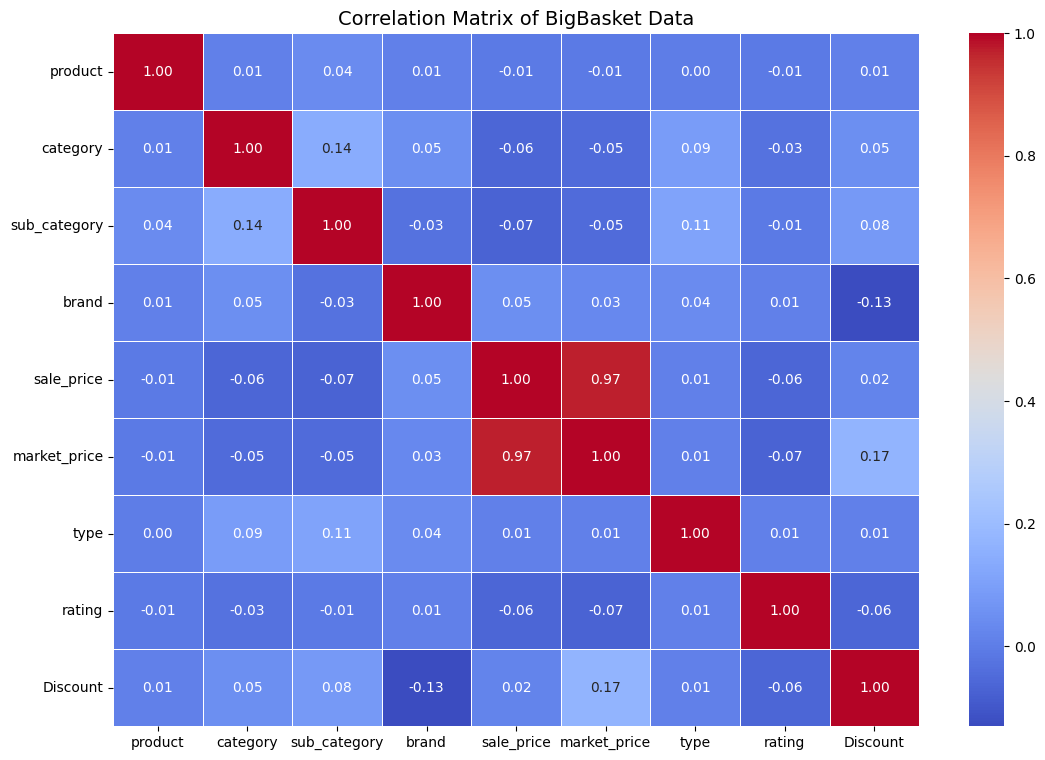

product  category  sub_category  brand  sale_price  \
product          1.00      0.01          0.04   0.01       -0.01   
category         0.01      1.00          0.14   0.05       -0.06   
sub_category     0.04      0.14          1.00  -0.03       -0.07   
brand            0.01      0.05         -0.03   1.00        0.05   
sale_price      -0.01     -0.06         -0.07   0.05        1.00   
market_price    -0.01     -0.05         -0.05   0.03        0.97   
type             0.00      0.09          0.11   0.04        0.01   
rating          -0.01     -0.03         -0.01   0.01       -0.06   
Discount         0.01      0.05          0.08  -0.13        0.02   

              market_price  type  rating  Discount  
product              -0.01  0.00   -0.01      0.01  
category             -0.05  0.09   -0.03      0.05  
sub_category         -0.05  0.11   -0.01      0.08  
brand                 0.03  0.04    0.01     -0.13  
sale_price            0.97  0.01   -0.06      0.02  
market_price          1.00  0.01   -0.07      0.17  
type                  0.01  1.00    0.01      0.01  
rating               -0.07  0.01    1.00     -0.06  
Discount              0.17  0.01   -0.06      1.00

In [ ]:
# Drop unnecessary columns
df_numeric = df.drop(columns=['description'])

# Convert categorical columns into numerical using label encoding
categorical_cols = ['product', 'category', 'sub_category', 'brand', 'type']
df_numeric[categorical_cols] = df_numeric[categorical_cols].astype(
    'category').apply(lambda x: x.cat.codes)

# Compute the correlation matrix
corr_matrix = df_numeric.corr().round(2)

# Plot the heatmap
plt.figure(figsize=(13, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',
            fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of BigBasket Data", fontsize=14)
plt.show()
corr_matrix

In [ ]:
# sns.histplot(df.Discount, bins =8)
# plt.xlabel("Discount%")
# plt.ylabel("Value")
# plt.show()

Mean of Discount:  11.833442545282264
Standard Deviation of Discount:  14.624817589997614


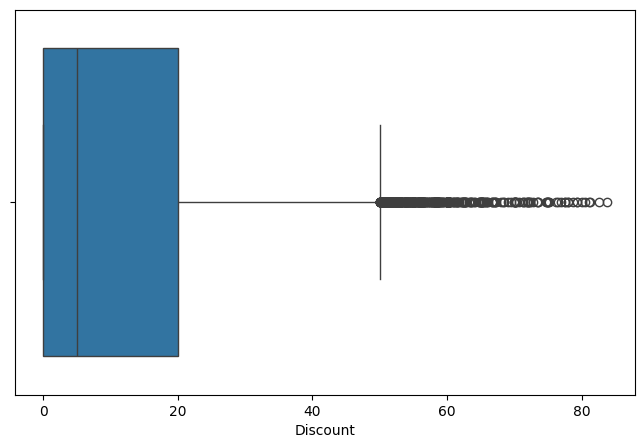

In [ ]:
plt.figure(figsize = (8,5))
sns.boxplot(x=df.Discount)
print("Mean of Discount: ", df.Discount.mean())
print("Standard Deviation of Discount: ", df.Discount.std())

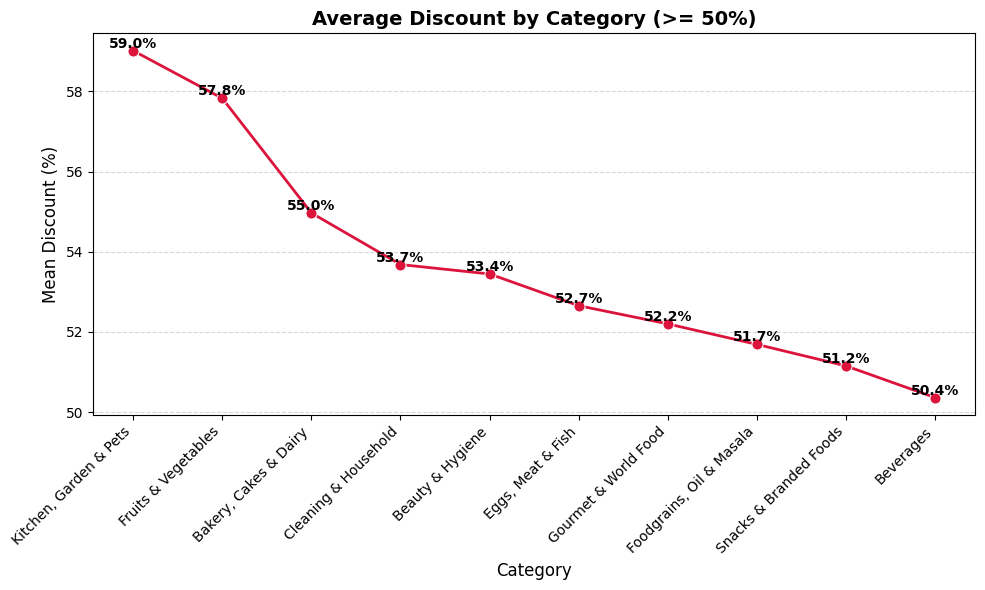

In [ ]:
# Filter data where Discount is ≤ 50
dis_df = df[df["Discount"] >= 50]

# Compute mean discount by category and sort
discount = dis_df.groupby(by="category")[
    "Discount"].mean().sort_values(ascending=False)

# Create figure
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x=discount.index, y=discount.values, marker='o',
                  linestyle='-', color='crimson', linewidth=2, markersize=8)

# Rotate x-axis labels
plt.xticks(rotation=45, ha="right")

# Add labels on data points
for i, value in enumerate(discount.values):
    ax.text(i, value, f"{value:.1f}%", ha="center", va="bottom",
            fontsize=10, fontweight="bold", color="black")

# Titles and labels
plt.title("Average Discount by Category (>= 50%)",
          fontsize=14, fontweight="bold")
plt.xlabel("Category", fontsize=12)
plt.ylabel("Mean Discount (%)", fontsize=12)

# Grid and layout adjustments
plt.grid(axis='y', linestyle='dashed', alpha=0.5)
plt.tight_layout()

# Show plot
plt.show()

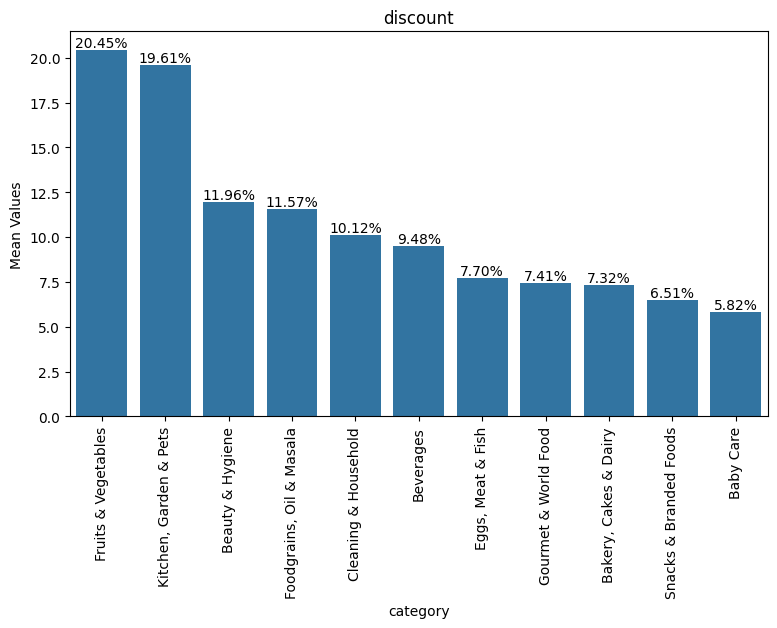

In [ ]:
dis_df =  df[df.Discount <= 50]
discount=dis_df.groupby(by = 'category')['Discount'].mean().sort_values(ascending = False)

plt.figure(figsize = (9,5))
ax= sns.barplot(x=discount.index, y= discount.values)
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0],fmt="%.2f%%", fontsize=10)
plt.title("discount")
plt.ylabel('Mean Values')
plt.show()

<ipython-input-2105-81d431da9c66>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




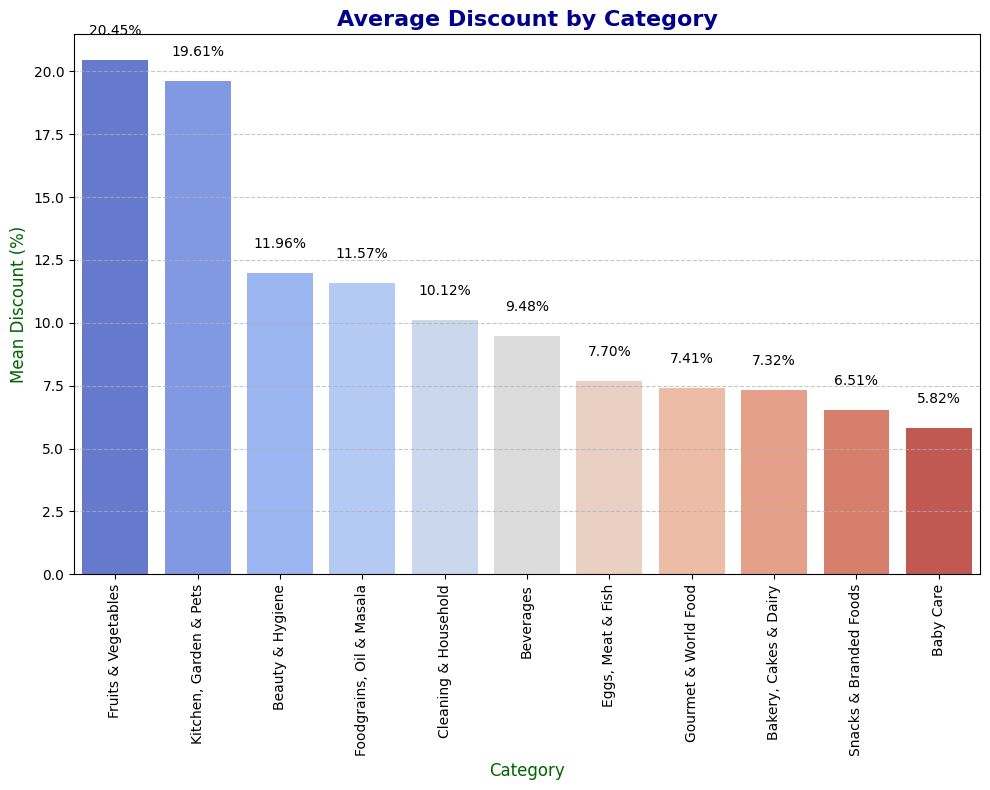

In [ ]:
# Filter data where Discount is <= 50
dis_df = df[df["Discount"] <= 50]

# Calculate mean discount per category and sort in descending order
discount = dis_df.groupby(by="category")[
    "Discount"].mean().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=discount.index, y=discount.values, palette="coolwarm")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, fontsize=10)

# Add percentage labels on the bars
for i, value in enumerate(discount.values):
    ax.text(i, value + 1, f"{value:.2f}%",
            ha="center", fontsize=10, color="black")

# Add titles and labels
plt.title("Average Discount by Category", fontsize=16,
          fontweight="bold", color="darkblue")
plt.ylabel("Mean Discount (%)", fontsize=12, color="darkgreen")
plt.xlabel("Category", fontsize=12, color="darkgreen")

# Add gridlines for better clarity
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-2106-323716c297e8>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




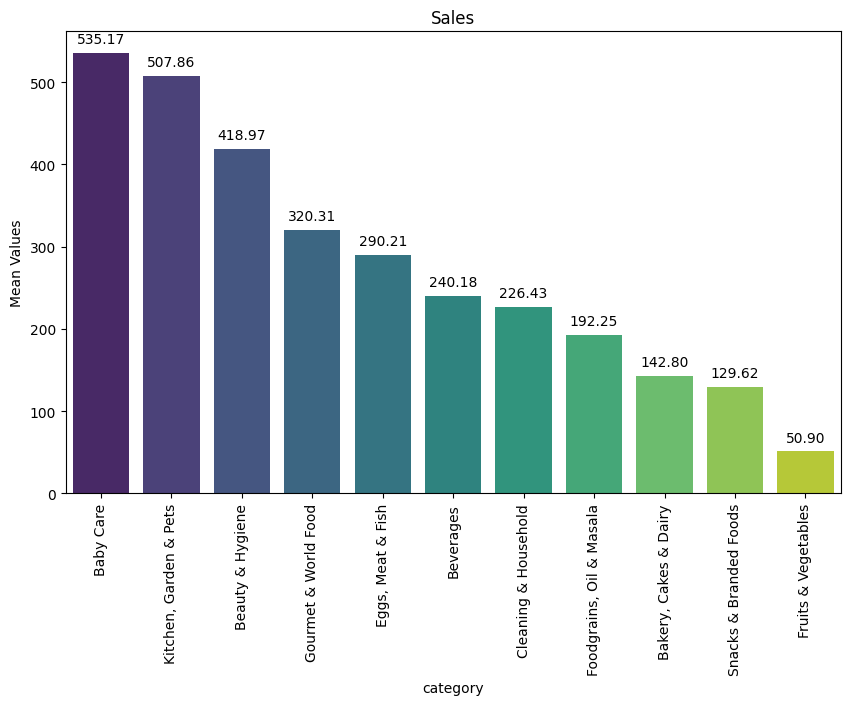

In [ ]:
sales = df.groupby(by='category')[
    'sale_price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=sales.index, y=sales.values, palette='viridis')
plt.xticks(rotation=90)

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title("Sales")
plt.ylabel('Mean Values')
plt.show()

<ipython-input-2107-a41d1a159a64>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




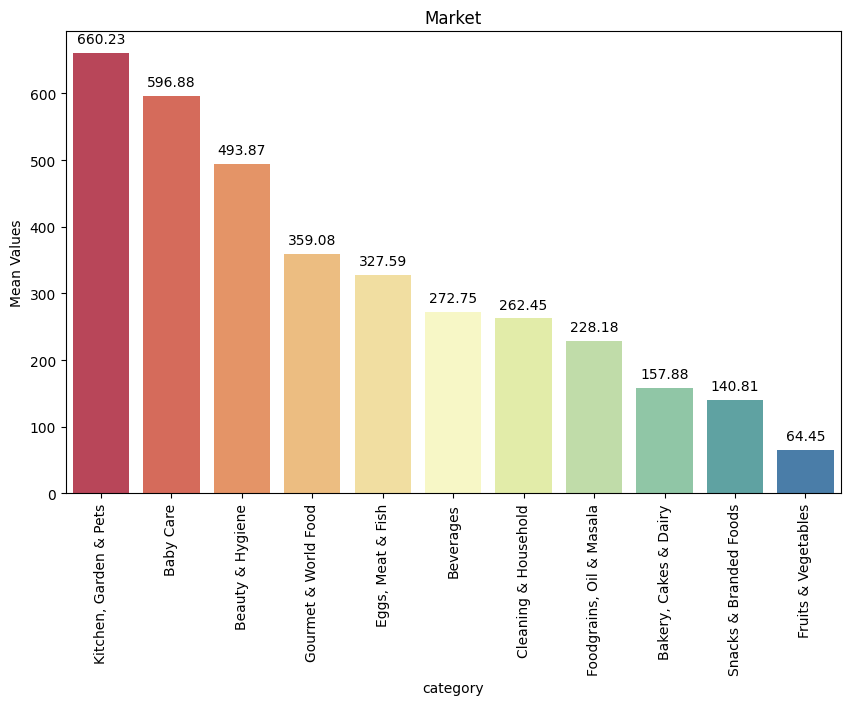

In [ ]:
market = df.groupby(by='category')[
    'market_price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=market.index, y=market.values, palette='Spectral')
plt.xticks(rotation=90)

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title("Market")
plt.ylabel('Mean Values')
plt.show()

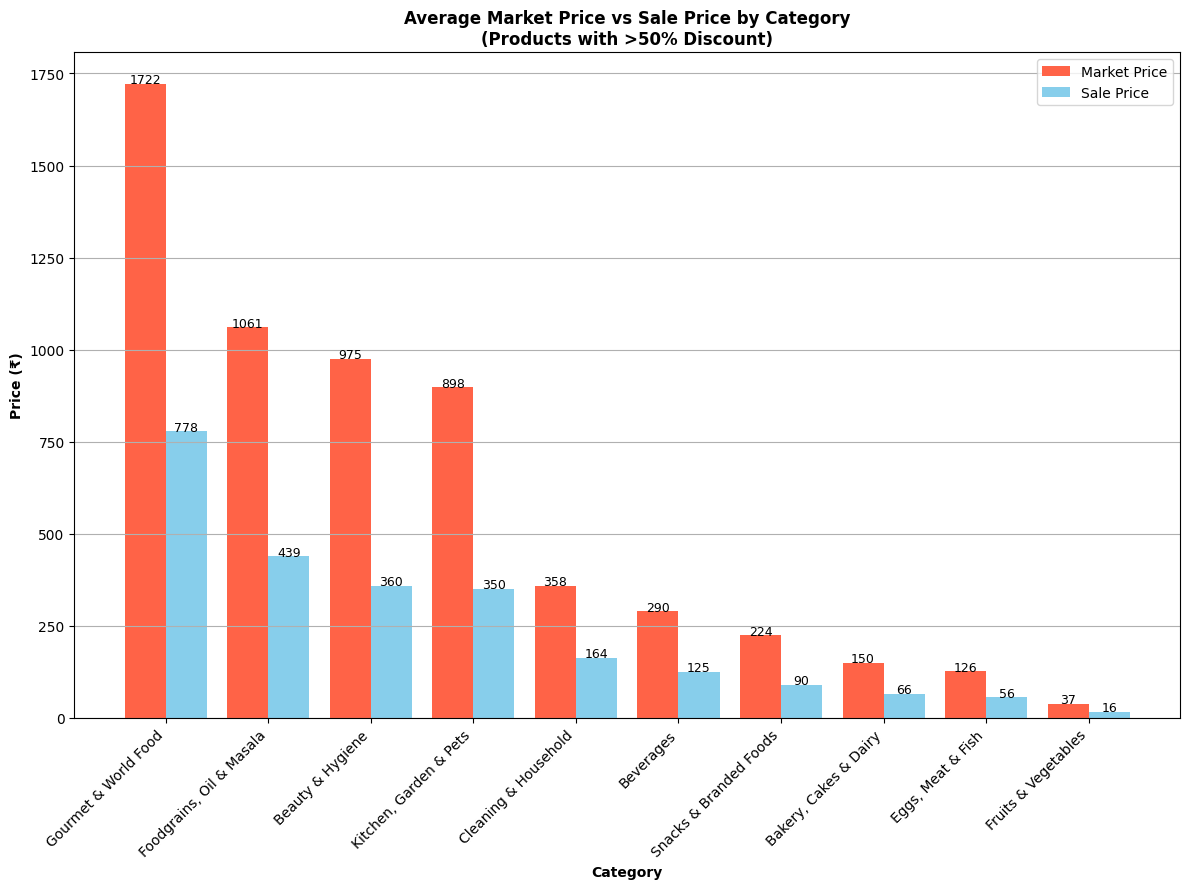

In [ ]:

# Filter products with discount > 50%

overpriced = df[df['Discount'] > 50].copy()

# Calculate average prices by category
avg_prices = overpriced.groupby(
    'category')[['market_price', 'sale_price']].mean().reset_index()

# Calculate inflation amount and sort
avg_prices['inflation_amount'] = avg_prices['market_price'] - \
    avg_prices['sale_price']
avg_prices = avg_prices.sort_values('inflation_amount', ascending=False)

# Plotting
plt.figure(figsize=(12, 9))
bar_width = 0.4
x = np.arange(len(avg_prices['category']))

# Bars
bar1 = plt.bar(x - bar_width/2, avg_prices['market_price'],
               bar_width, label='Market Price', color='tomato')
bar2 = plt.bar(x + bar_width/2, avg_prices['sale_price'],
               bar_width, label='Sale Price', color='skyblue')

# Annotate values on top of each bar
for i in range(len(avg_prices)):
    plt.text(x[i] - bar_width/2, avg_prices['market_price'].iloc[i] + 2,
             f"{avg_prices['market_price'].iloc[i]:.0f}", ha='center', fontsize=9)
    plt.text(x[i] + bar_width/2, avg_prices['sale_price'].iloc[i] + 2,
             f"{avg_prices['sale_price'].iloc[i]:.0f}", ha='center', fontsize=9)

# X-axis and Labels
plt.xticks(x, avg_prices['category'], rotation=45, ha='right')
plt.title(
    'Average Market Price vs Sale Price by Category\n(Products with >50% Discount)', fontweight="bold")
plt.xlabel('Category', fontweight="bold")
plt.ylabel('Price (₹)', fontweight="bold")
plt.legend()
plt.tight_layout()
plt.grid(axis='y')

plt.show()

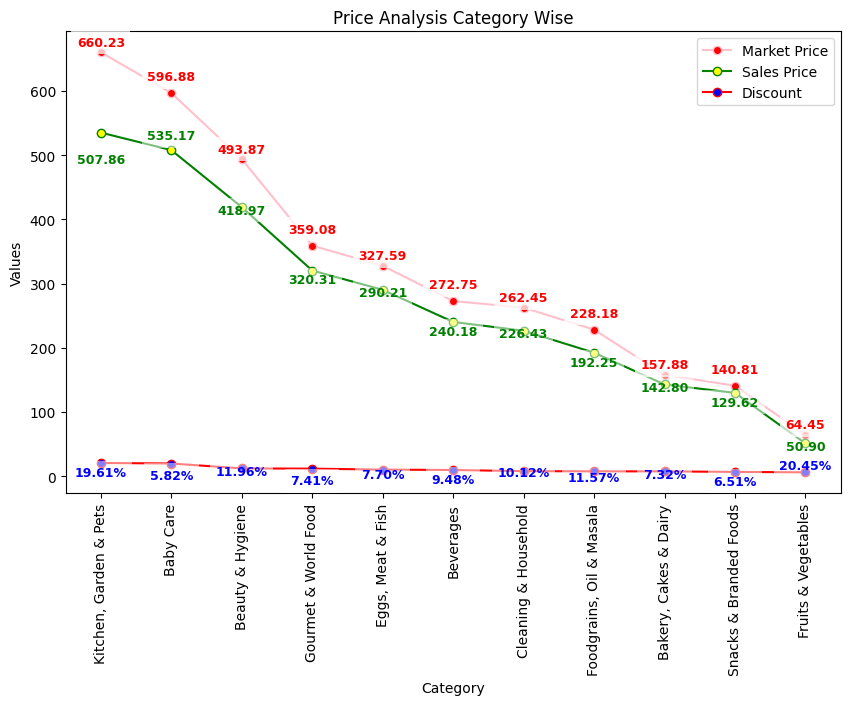

In [ ]:
market = df.groupby(by='category')[
    'market_price'].mean().sort_values(ascending=False)
sales = df.groupby(by='category')[
    'sale_price'].mean().sort_values(ascending=False)
plt.figure(figsize= (10,6))
plt.plot(market.index, market.values, color='pink', marker='o',
         markerfacecolor='red', label='Market Price')
# Show Market Price values above the line
for i, txt in enumerate(market.values):
    offset = 10 if i % 2 == 0 else 20  # Alternating offset
    plt.text(market.index[i], market.values[i] + offset, f"{txt:.2f}",
             ha='center', fontsize=9, color='red', fontweight='bold',
             bbox=dict(facecolor='white', alpha=0.75, edgecolor='none'))

plt.plot(sales.values, color= 'green', marker='o', markerfacecolor='yellow',label='Sales Price')
# Show Sales Price values below the line with alternating spacing
for i, txt in enumerate(sales.values):
    offset = -10 if i % 2 == 0 else -20  # Alternating offset
    plt.text(sales.index[i], sales.values[i] + offset, f"{txt:.2f}",
             ha='center', fontsize=9, color='green', fontweight='bold',
             bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

plt.plot(discount.values, color= 'red', marker='o', markerfacecolor='blue',label='Discount')

# Show Discount values with slight adjustments
for i, txt in enumerate(discount.values):
    offset = -10 if i % 2 == 0 else -20  # Alternating offset
    plt.text(discount.index[i], discount.values[i] + offset, f"{txt:.2f}%",
             ha='center', fontsize=9, color='blue', fontweight='bold',
             bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))


plt.xticks(rotation = 90)
plt.title("Price Analysis Category Wise")
plt.ylabel('Values')
plt.xlabel("RED - Discount% / Green - SP / Pink - MP ")
plt.xlabel("Category")
plt.legend()
plt.show()

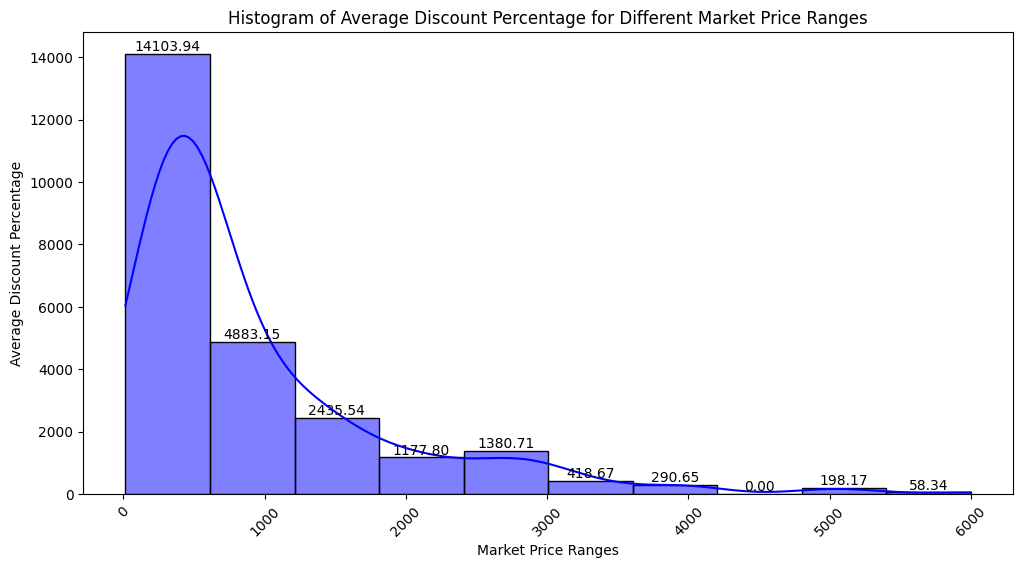

In [ ]:
discounted_products = df[df["Discount"] > 50]

plt.figure(figsize=(12, 6))

# Plot histogram for discount distribution across market price ranges
histplot = sns.histplot(discounted_products, x="market_price", weights="Discount",
                        bins=10, kde=True, color="blue", edgecolor="black")

plt.title(
    "Histogram of Average Discount Percentage for Different Market Price Ranges")
plt.xlabel("Market Price Ranges")
plt.ylabel("Average Discount Percentage")
plt.xticks(rotation=45)

# Annotate bar values
for bar in histplot.patches:
    height = bar.get_height()
    histplot.annotate(format(height, '.2f'),
                      (bar.get_x() + bar.get_width() / 2., height),
                      ha='center', va='center', xytext=(0, 5),
                      textcoords='offset points')

plt.show()

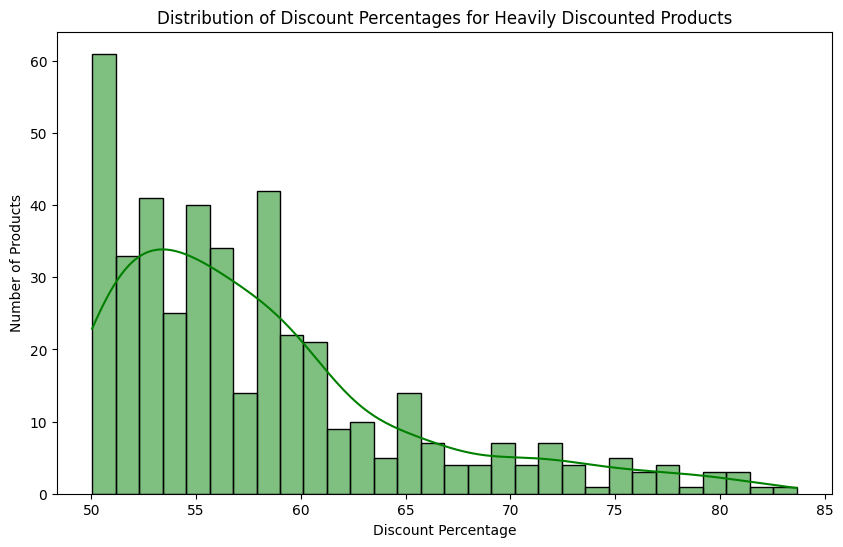

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(discounted_products["Discount"], bins=30, kde=True, color="green")
plt.title("Distribution of Discount Percentages for Heavily Discounted Products")
plt.xlabel("Discount Percentage")
plt.ylabel("Number of Products")
plt.show()

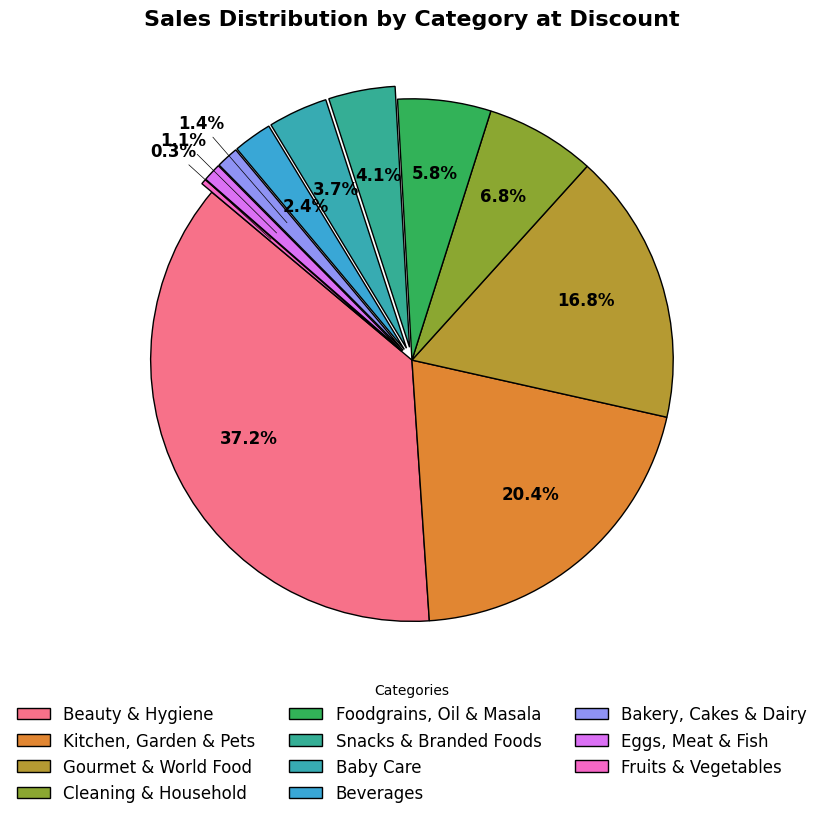

In [ ]:

# Select discount range for analysis
# selected_range = "50-60%"

# # Filter data for the selected discount range
# filtered_data = df[df["Discount"] == selected_range]

# Aggregate sales by category
category_sales = df.groupby(
    "category")["sale_price"].sum().sort_values(ascending=False)

# Define colors using seaborn
colors = sns.color_palette("husl", len(category_sales))

# Compute percentage values
percentages = (category_sales / category_sales.sum()) * 100

# Dynamically explode small sections for visibility
explode = [0.05 if pct < 5 else 0 for pct in percentages]

# Create figure
fig, ax = plt.subplots(figsize=(12, 8))

# Create pie chart
wedges, texts, autotexts = ax.pie(
    category_sales,
    labels=None,  # No labels, use legend instead
    autopct="",
    startangle=140,
    colors=colors,
    pctdistance=0.75,  # Position of percentage labels
    explode=explode,
    wedgeprops={"edgecolor": "black", "linewidth": 1},
)

# Adjust percentage text positions
for wedge, pct, category in zip(wedges, percentages, category_sales.index):
    angle = (wedge.theta2 + wedge.theta1) / 2  # Midpoint angle
    x = wedge.r * 0.7 * np.cos(np.radians(angle))  # ✅ Use np.cos
    y = wedge.r * 0.7 * np.sin(np.radians(angle))  # ✅ Use np.sin

    if pct < 2:  # Move text outside for very small percentages
        x_out = wedge.r * 1.2 * np.cos(np.radians(angle))  # Adjusted X
        y_out = wedge.r * 1.2 * np.sin(np.radians(angle))  # Adjusted Y
        ax.annotate(f"{pct:.1f}%", (x, y), xytext=(x_out, y_out),
                    arrowprops=dict(arrowstyle="-", color="black", lw=0.5),
                    fontsize=12, weight="bold", ha="center")
    else:  # Place text inside for larger percentages
        ax.text(x, y, f"{pct:.1f}%", fontsize=12, weight="bold", ha="center")

# Add legend with 2-line space gap
plt.subplots_adjust(bottom=0.25)  # Increase space at bottom
ax.legend(wedges, category_sales.index, title="Categories", loc="lower center",
          bbox_to_anchor=(0.5, -0.2), ncol=3, fontsize=12, frameon=False)

# Add title
plt.title(
    f"Sales Distribution by Category at Discount", fontsize=16, weight="bold")
plt.tight_layout()
plt.show()

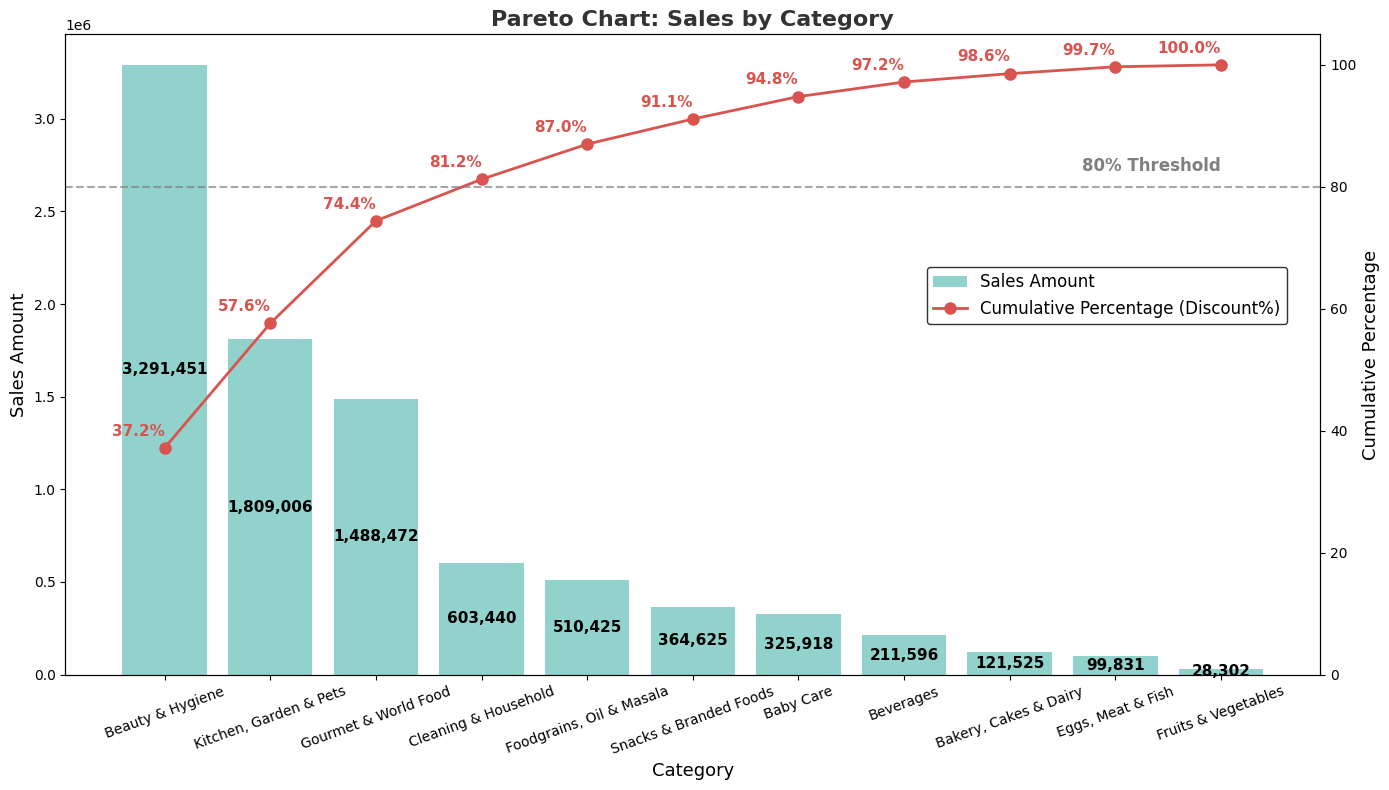

In [ ]:


# Aggregate sales by category (sorted)
category_sales = df.groupby(
    "category")["sale_price"].sum().sort_values(ascending=False)

# Compute cumulative percentage
cumulative_percentage = category_sales.cumsum() / category_sales.sum() * 100

# Define figure and axis
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar chart (Sales by Category)
bars = ax1.bar(category_sales.index, category_sales,
               color='#76c7c0', alpha=0.8, label="Sales Amount")
ax1.set_ylabel("Sales Amount", fontsize=13)
ax1.set_xlabel("Category", fontsize=13)
ax1.tick_params(axis="x", rotation=20)

# Secondary axis (Cumulative Percentage)
ax2 = ax1.twinx()
ax2.plot(category_sales.index, cumulative_percentage, color='#d9534f',
         marker='o', markersize=8, linestyle='-', linewidth=2,
         label="Cumulative Percentage (Discount%)")
ax2.set_ylabel("Cumulative Percentage", fontsize=13)
ax2.set_ylim(0, 105)  # Slightly increase limit for better visibility

# 80% threshold line
ax2.axhline(80, color="gray", linestyle="dashed", alpha=0.7)
ax2.text(len(category_sales)-1, 82, "80% Threshold", fontsize=12,
         color="gray", ha="right", va="bottom", fontweight="bold")

# Add labels inside bars (white text for contrast)
for i, (sales, cum_pct) in enumerate(zip(category_sales, cumulative_percentage)):
    # Inside bar labels
    ax1.text(i, sales * 0.5,  # Move inside (50% of height)
             f"{int(sales):,}", ha='center', va='center',
             fontsize=11, fontweight="bold", color="black")

    # Cumulative percentage labels
    ax2.text(i, cum_pct + 2, f"{cum_pct:.1f}%", ha='right',
             fontsize=11, fontweight="bold", color='#d9534f')

# Title
ax1.set_title("Pareto Chart: Sales by Category",
              fontsize=16, weight="bold", color="#333")

# Merge legends into a single box
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
legend = ax1.legend(lines + lines2, labels + labels2,
                    loc="upper right", fontsize=12,
                    frameon=True, edgecolor="black",
                    bbox_to_anchor=(0.98, 0.65))

# Beautify legend
legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('black')

plt.tight_layout()
plt.show()

<ipython-input-2114-f05ef927b3c0>:12: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



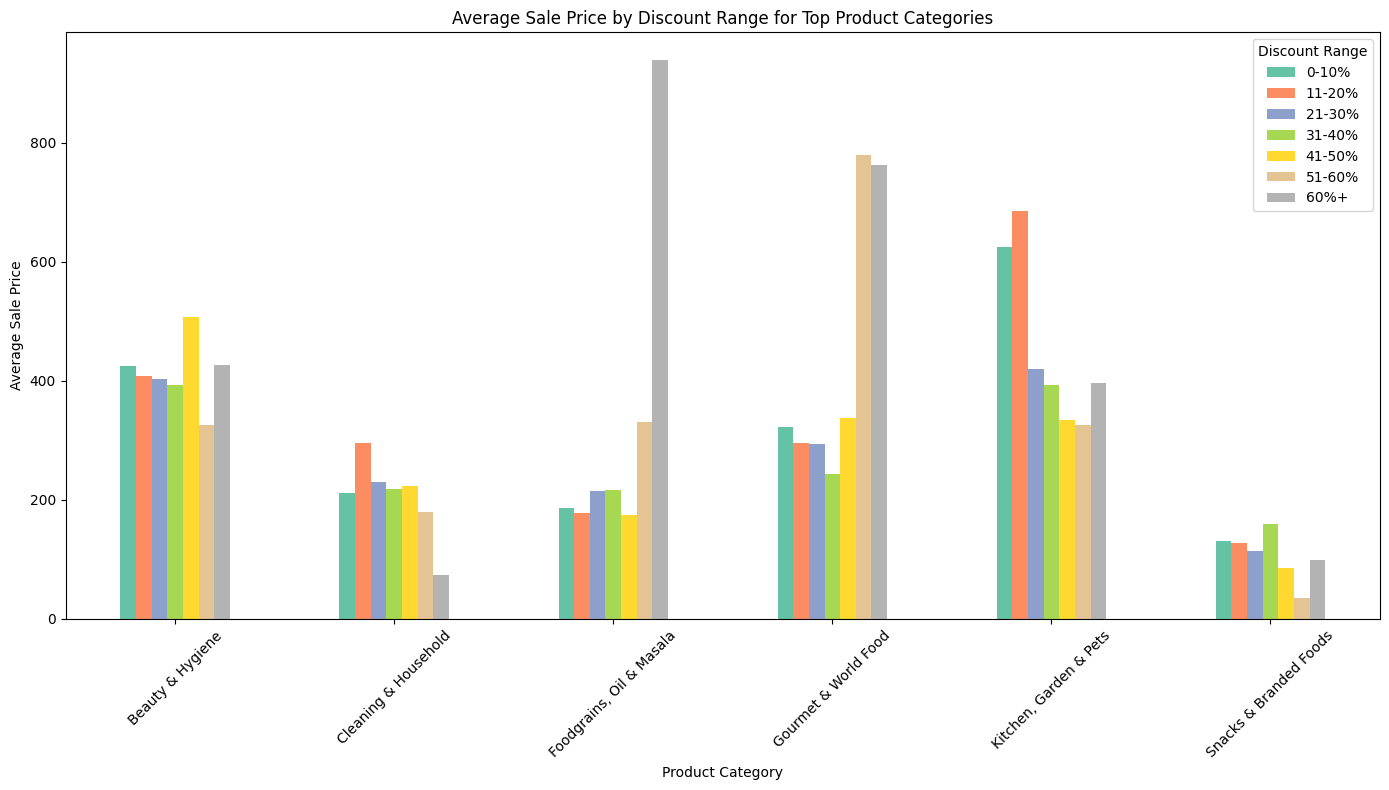

In [ ]:
df_clean = df.dropna(subset=['category', 'sale_price', 'Discount'])
discount_bins = [0, 10, 20, 30, 40, 50, 60, 100]
discount_labels = ['0-10%', '11-20%', '21-30%',
                   '31-40%', '41-50%', '51-60%', '60%+']
df_clean['discount_range'] = pd.cut(
    df_clean['Discount'], bins=discount_bins, labels=discount_labels, include_lowest=True)

top_categories = df_clean['category'].value_counts().nlargest(6).index
df_top = df_clean[df_clean['category'].isin(top_categories)]

# Prepare aggregated data
agg_data = df_top.groupby(['category', 'discount_range'])[
    'sale_price'].mean().unstack()

# Plotting a clustered bar chart
agg_data.plot(kind='bar', figsize=(14, 8), colormap='Set2')
plt.title("Average Sale Price by Discount Range for Top Product Categories")
plt.ylabel("Average Sale Price")
plt.xlabel("Product Category")
plt.xticks(rotation=45)
plt.legend(title="Discount Range")
plt.tight_layout()
plt.show()

In [ ]:
import plotly.graph_objects as go

# Define discount bins and labels
bins = [0, 0.0001, 10, 20, 30, 40, 50, 100]
labels = ['0%', '0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '>50%']
df['Discount_Range'] = pd.cut(
    df['Discount'], bins=bins, labels=labels, include_lowest=True, right=False)

df = df[df['Discount_Range'] != '0%']
# Group by category and discount range
grouped = df.groupby(['category', 'Discount_Range']
                     ).size().unstack(fill_value=0)

# Create the figure
fig = go.Figure()

for discount_range in grouped.columns:
    fig.add_trace(
        go.Bar(
            x=grouped.index,
            y=grouped[discount_range],
            name=discount_range,
            text=grouped[discount_range],
            textposition='auto',
            textfont=dict(
                size=16,
                family="Arial Black, sans-serif",
                color='black'
            )
        )
    )

# Update layout for better visibility
fig.update_layout(
    title=dict(
        text='Number of Products by Category at Different Discount Levels',
        font=dict(size=24, family='Arial Black')
    ),
    xaxis=dict(
        title='Category',
        titlefont=dict(size=20, family='Arial Black'),
        tickfont=dict(size=19, family='Arial'),
        tickangle=-45
    ),
    yaxis=dict(
        title='Number of Products',
        titlefont=dict(size=20, family='Arial Black'),
        tickfont=dict(size=19, family='Arial')
    ),
    legend_title=dict(
        text='Discount Range',
        font=dict(size=18, family='Arial Black')
    ),
    legend=dict(font=dict(size=17)),
    barmode='stack',
    template='plotly_white',
    uniformtext_mode='hide',
    width=2000,
    height=1000
)

# Show and save the chart
fig.show()
# fig.write_image("final_stacked_bar_big_bold_clear.png",
#                 width=2000, height=1000)

<ipython-input-2115-307add59fc37>:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:

# Define discount bins and labels
bins = [0, 0.0001, 10, 20, 30, 40, 50, 100]
labels = ['0%', '0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '>50%']
df['Discount_Range'] = pd.cut(
    df['Discount'], bins=bins, labels=labels, include_lowest=True, right=False)

df = df[df['Discount_Range'] != '0%']
# Group by category and discount range
df = df[df['sub_category'] != 'Others']
grouped = df.groupby(['sub_category', 'Discount_Range']
                     ).size().unstack(fill_value=0)

# Create the figure
fig = go.Figure()

for discount_range in grouped.columns:
    fig.add_trace(
        go.Bar(
            x=grouped.index,
            y=grouped[discount_range],
            name=discount_range,
            text=grouped[discount_range],
            textposition='auto',
            textfont=dict(
                size=16,
                family="Arial Black, sans-serif",
                color='black'
            )
        )
    )

# Update layout for better visibility
fig.update_layout(
    title=dict(
        text='Number of Products by sub_category at Different Discount Levels',
        font=dict(size=24, family='Arial Black')
    ),
    xaxis=dict(
        title='sub_category',
        titlefont=dict(size=20, family='Arial Black'),
        tickfont=dict(size=19, family='Arial'),
        tickangle=-45
    ),
    yaxis=dict(
        title='Number of Products',
        titlefont=dict(size=20, family='Arial Black'),
        tickfont=dict(size=19, family='Arial')
    ),
    legend_title=dict(
        text='Discount Range',
        font=dict(size=18, family='Arial Black')
    ),
    legend=dict(font=dict(size=17)),
    barmode='stack',
    template='plotly_white',
    uniformtext_mode='hide',
    width=2000,
    height=1000
)

# Show and save the chart
fig.show()


<ipython-input-2116-1e73f4b60df4>:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



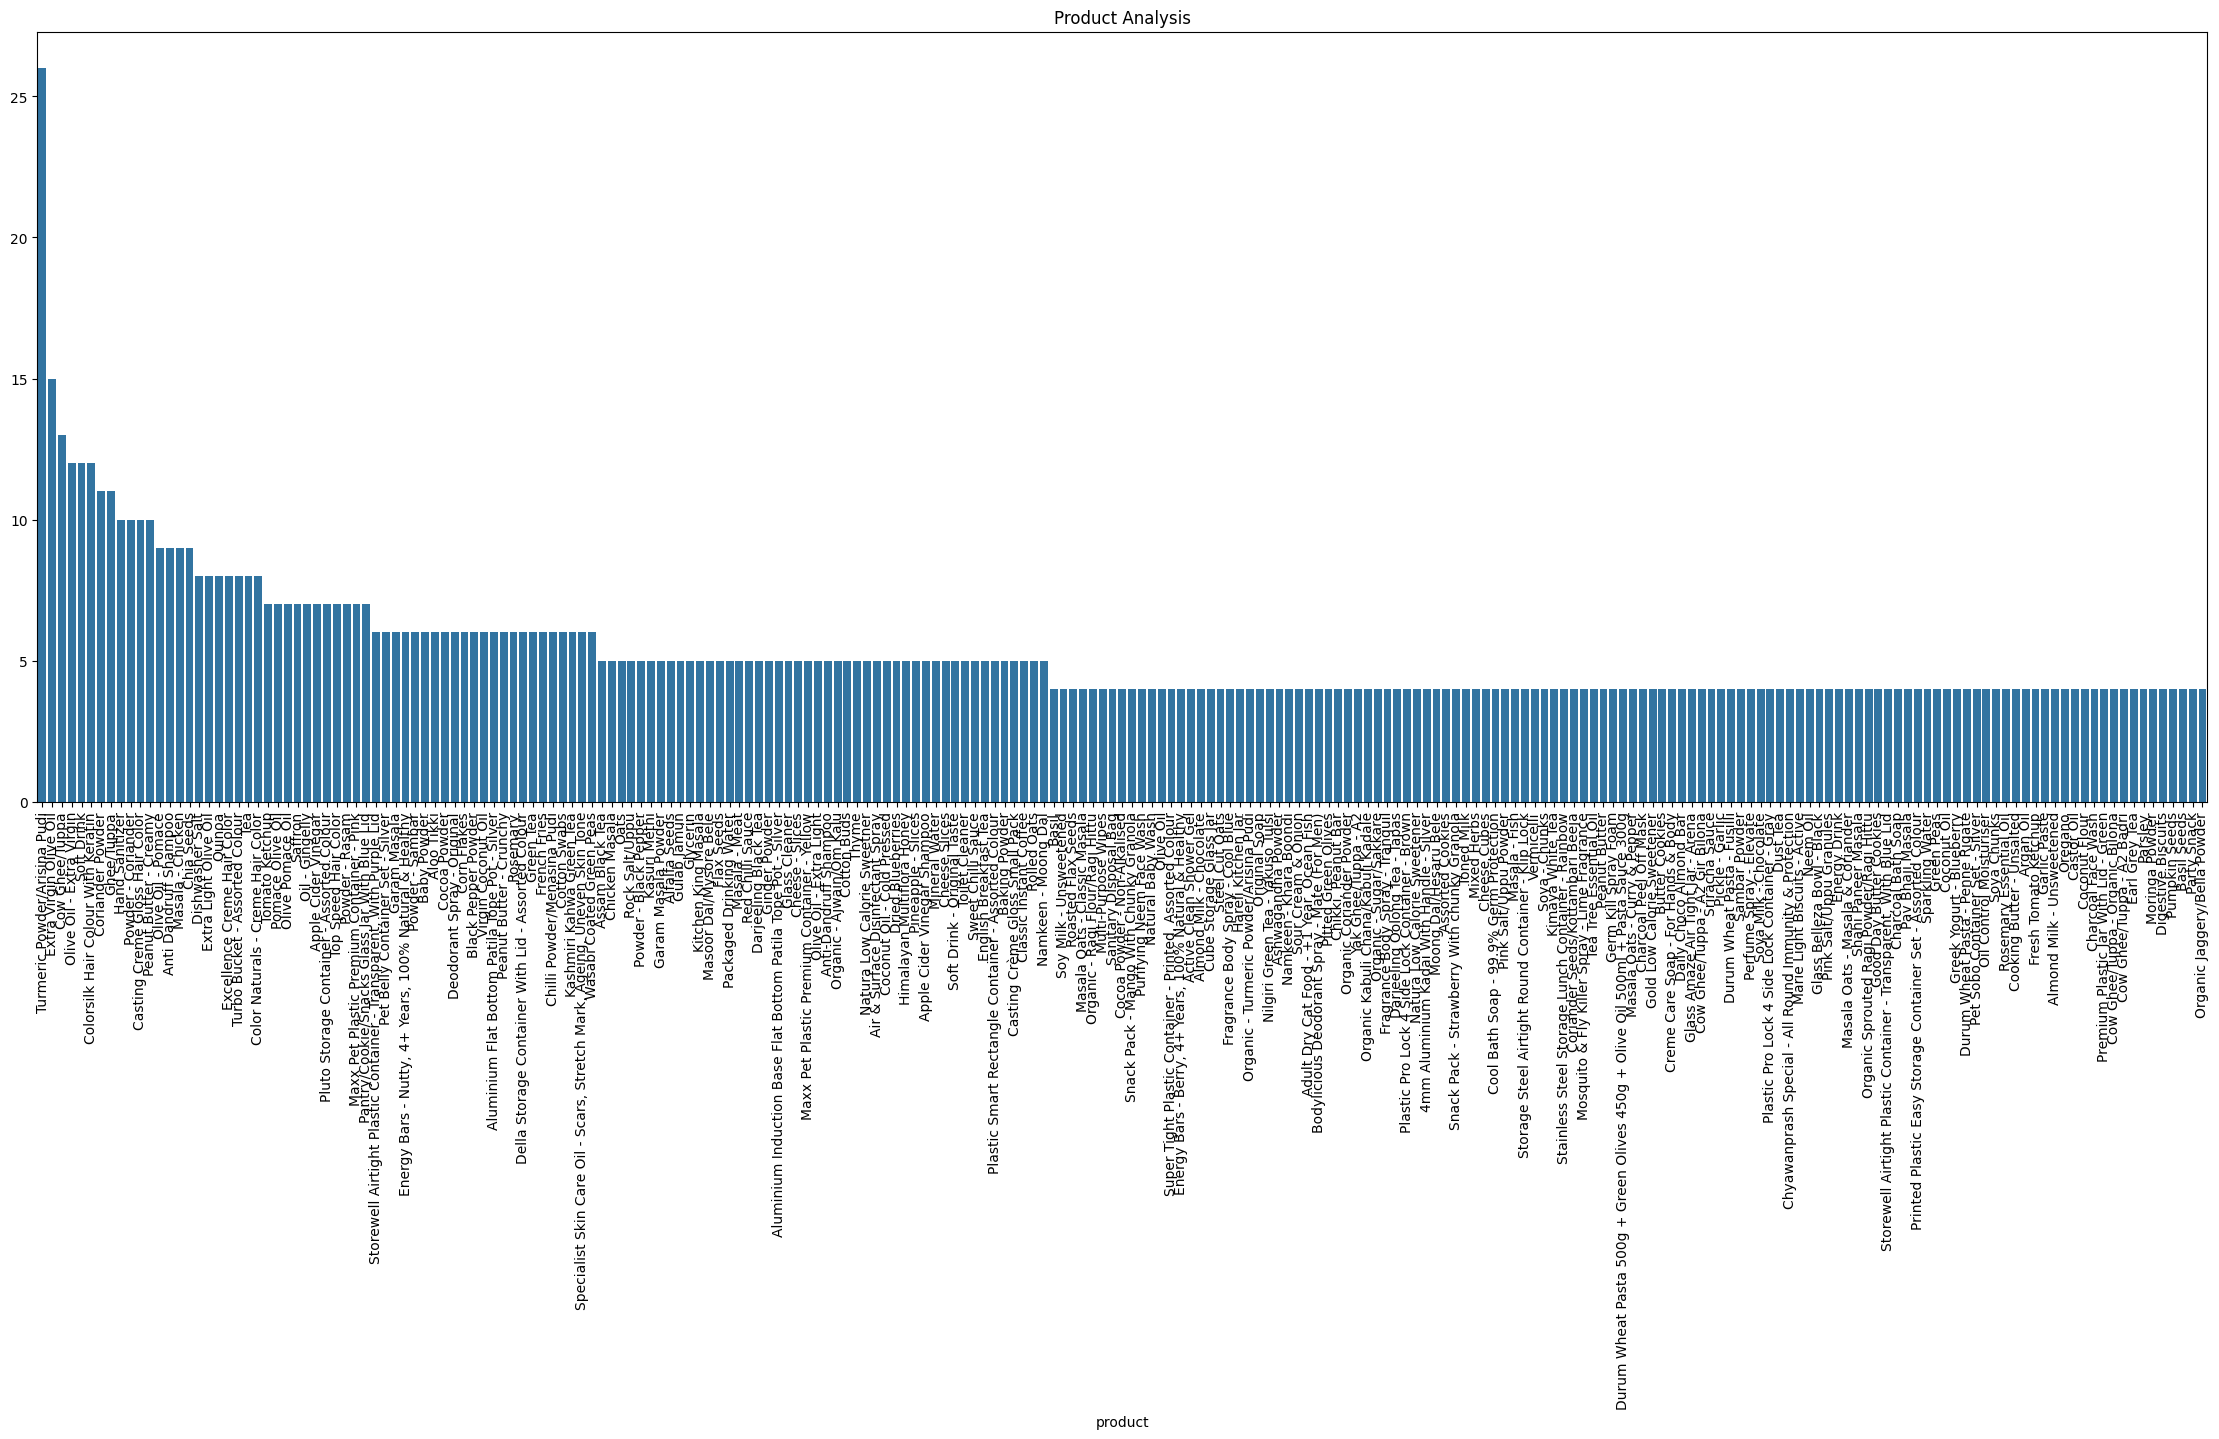

In [ ]:
pd.DataFrame(Product)
plt.figure(figsize = (28,10))
sns.barplot(x=Product.index, y=Product.values)
plt.xticks(rotation = 90)
plt.title("Product Analysis")
plt.show()

<ipython-input-2118-773a96e47f64>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




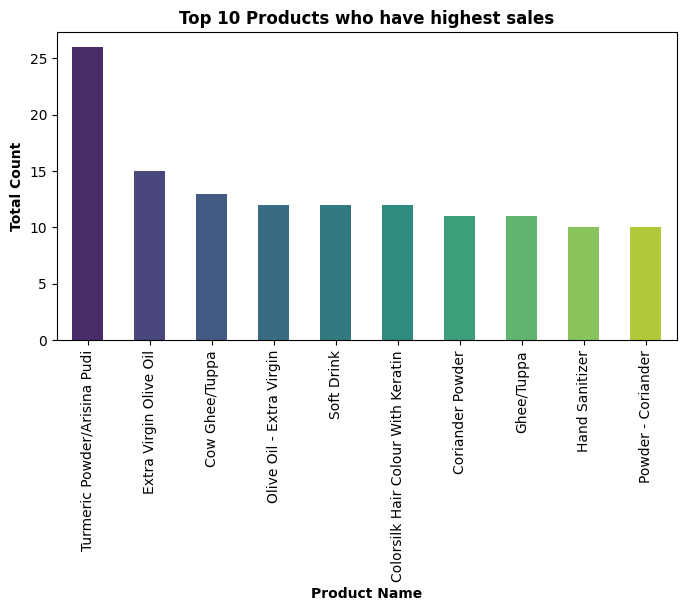

In [ ]:
k = Product.sort_values(ascending=False).head(10)
pd.DataFrame(k)

plt.figure(figsize = (8,4))
sns.barplot(x=k.index, y=k.values, width=0.5, palette="viridis")
plt.xticks(rotation = 90)
plt.ylabel("Total Count", fontweight="bold")
plt.xlabel("Product Name", fontweight="bold")
plt.title("Top 10 Products who have highest sales", fontweight="bold")
plt.show()

<ipython-input-2119-0ef321533309>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




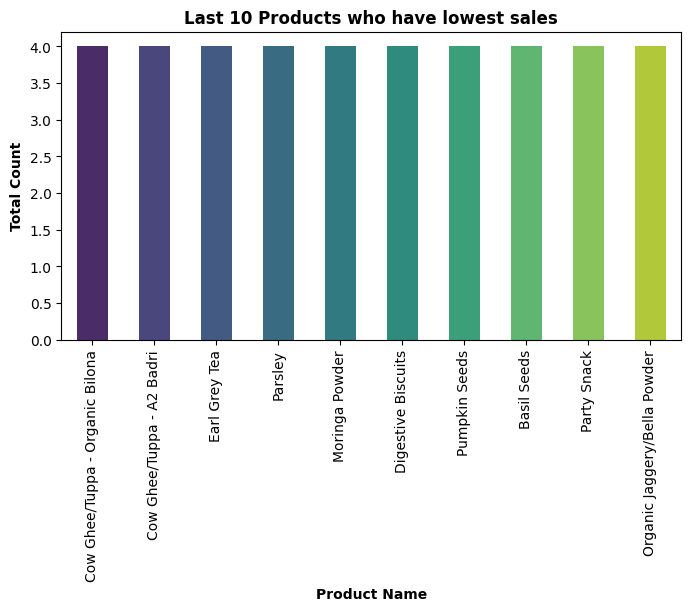

In [ ]:
k = Product.sort_values(ascending=False).tail(10)
pd.DataFrame(k)

plt.figure(figsize=(8, 4))
sns.barplot(x=k.index, y=k.values, width=0.5, palette="viridis")
plt.xticks(rotation=90)
plt.ylabel("Total Count", fontweight="bold")
plt.xlabel("Product Name", fontweight="bold")
plt.title("Last 10 Products who have lowest sales", fontweight="bold")
plt.show()

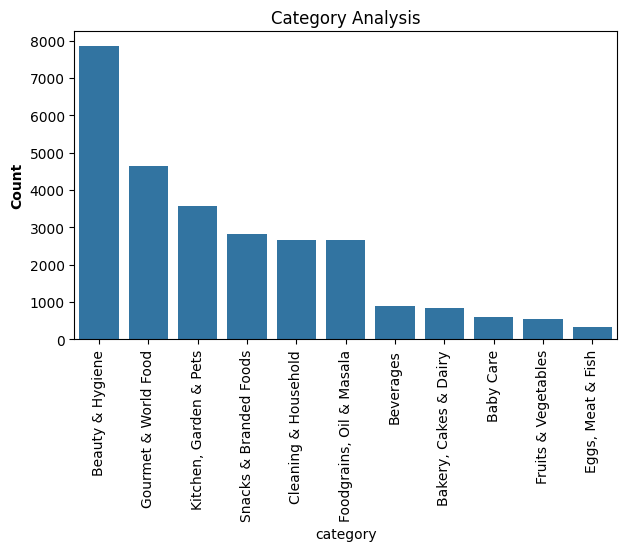

In [ ]:
plt.figure(figsize = (7,4))
sns.barplot(x=category_value.index, y=category_value.values)
plt.ylabel("Count", fontweight="bold")
plt.xticks(rotation = 90)
plt.title("Category Analysis")
plt.show()

<ipython-input-2121-89eaec38c1b3>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




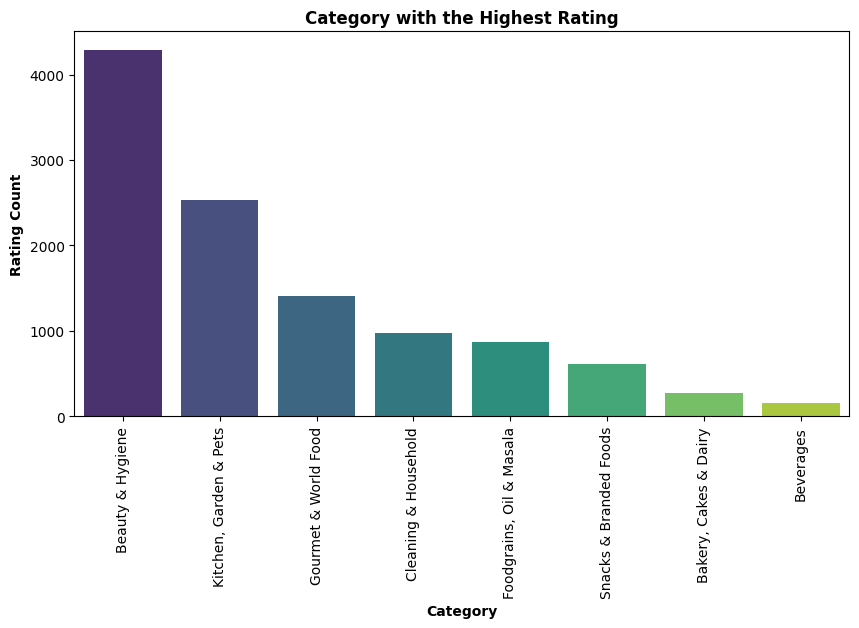

In [ ]:
x = df.groupby("category")["rating"].count()
y = x.sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=y.index, y=y.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Category", fontweight="bold")
plt.ylabel("Rating Count", fontweight="bold")
plt.title("Category with the Highest Rating", fontweight="bold")
plt.show()

<ipython-input-2122-b72305221b78>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




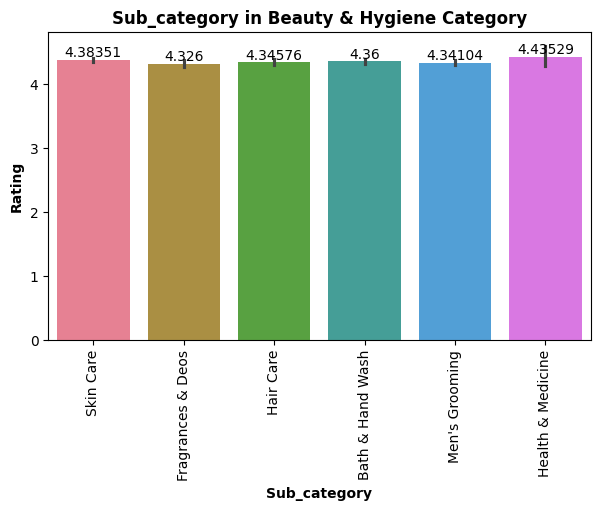

In [ ]:
# Filter the data
filter_1 = df[(df.category == "Beauty & Hygiene") &
                      (df.rating >= 4) &
                      (df.brand != "Others") &
                      (df.sub_category != "Others")]

# Generate unique colors for each bar
unique_colors = sns.color_palette(
    "husl", len(filter_1["sub_category"].unique()))

# Create the plot
plt.figure(figsize=(7, 4))
ax = sns.barplot(data=filter_1, x="sub_category",
                 y="rating", palette=unique_colors)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add value labels on top of each bar
for container in ax.containers:
    # 'edge' positions the label on the edge of the bar
    ax.bar_label(container, fontsize=10, label_type='edge')

# Add bold titles and labels
plt.title("Sub_category in Beauty & Hygiene Category", fontweight="bold")
plt.xlabel("Sub_category", fontweight="bold")
plt.ylabel("Rating", fontweight="bold")

# Show the plot
plt.show()

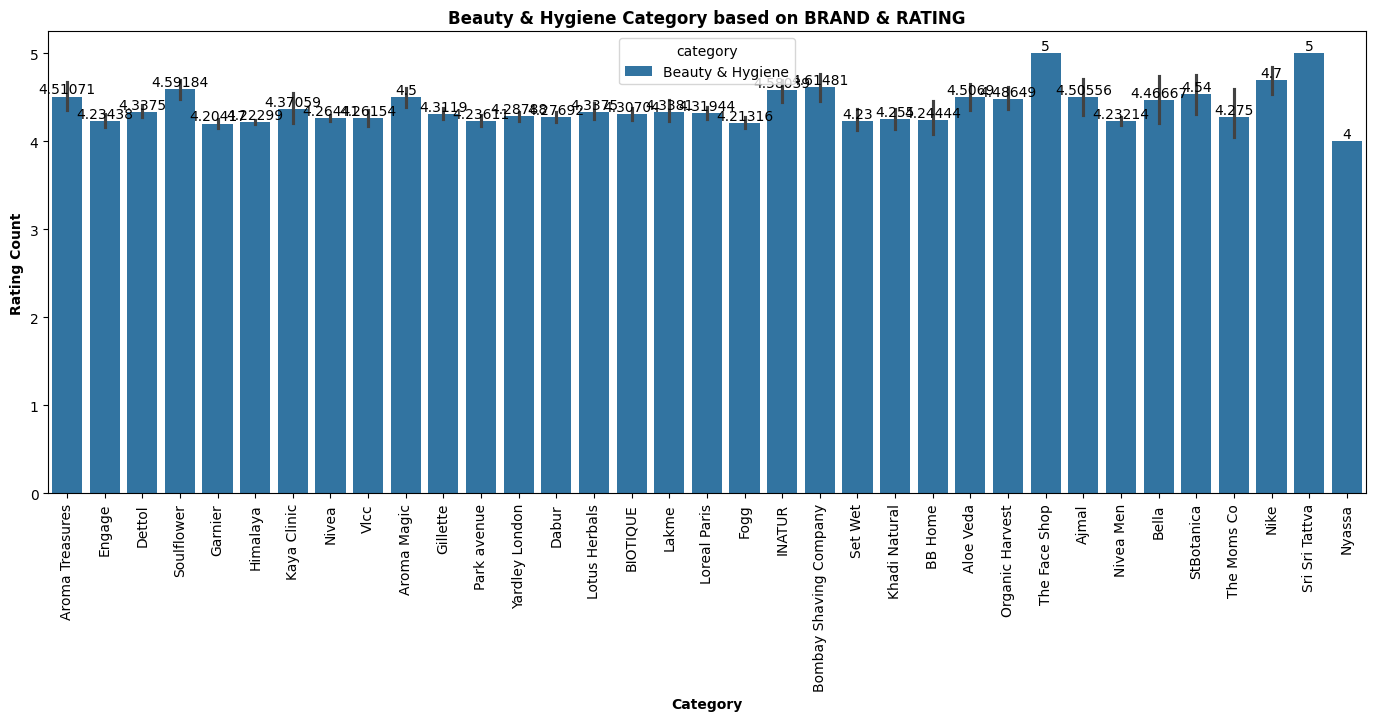

In [ ]:
plt.figure(figsize = (17,6))
ax = sns.barplot(data=filter_1,
                 x="brand", y="rating", hue="category")

plt.xticks(rotation = 90)
plt.ylabel("Rating Count", fontweight="bold")
plt.xlabel("Category", fontweight="bold")
plt.title("Beauty & Hygiene Category based on BRAND & RATING",
          fontweight="bold")

ax.bar_label(ax.containers[0], fontsize=10)

plt.show()

<ipython-input-2124-a9c64d63b547>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




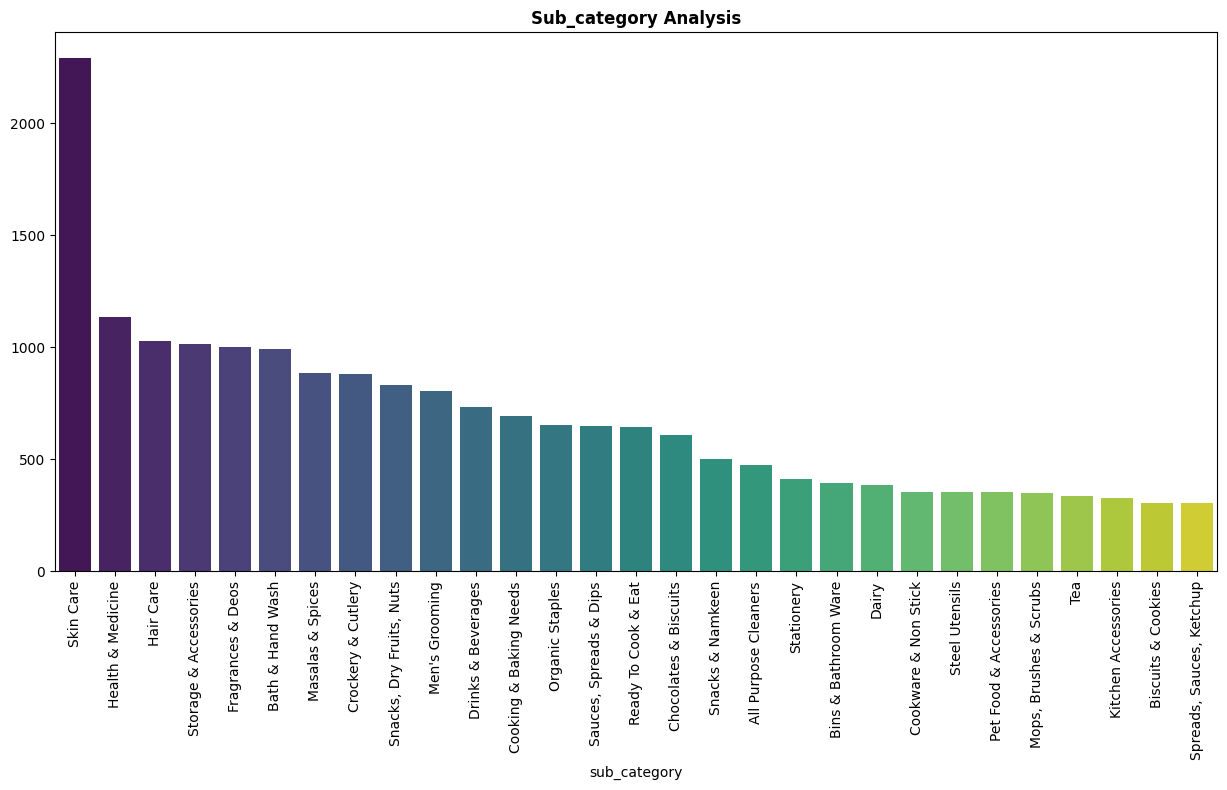

In [ ]:
pd.DataFrame(Sub_category)
plt.figure(figsize = (15,7))
sns.barplot(x=Sub_category.index, y=Sub_category.values, palette="viridis")
plt.xticks(rotation = 90)
plt.title("Sub_category Analysis", fontweight="bold")
plt.show()

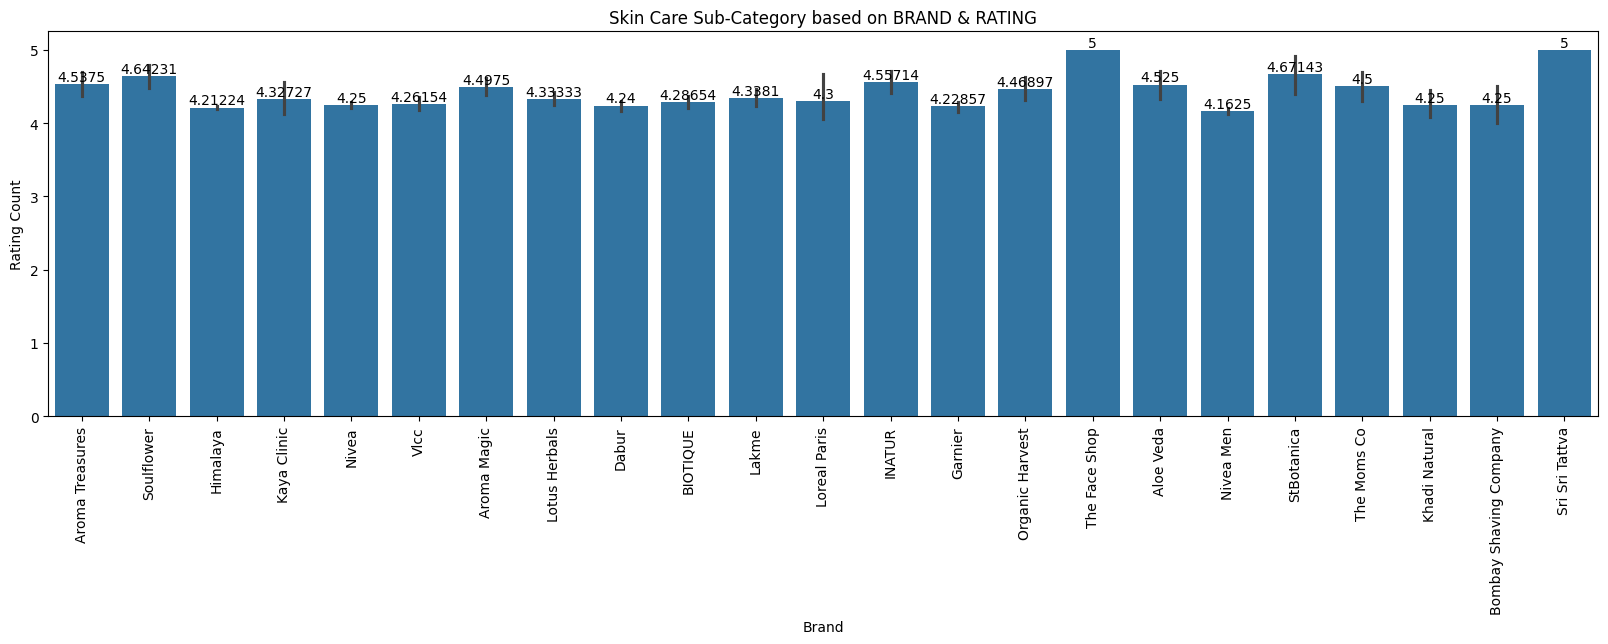

In [ ]:
filter_2 = df[(df.sub_category == "Skin Care") & (df.rating >=4 ) & (df.brand != "Others")]

plt.figure(figsize = (20,5))
ax = sns.barplot(data = filter_2, x="brand", y="rating")

plt.xticks(rotation = 90)
plt.ylabel("Rating Count")
plt.xlabel("Brand")
plt.title("Skin Care Sub-Category based on BRAND & RATING")

ax.bar_label(ax.containers[0], fontsize=10)

plt.show()

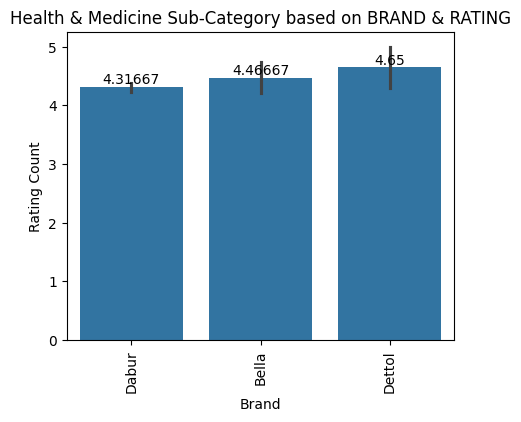

In [ ]:
filter_3 = df[(df.sub_category == "Health & Medicine") & (df.rating >=4 ) & (df.brand != "Others")]

plt.figure(figsize = (5,4))
ax = sns.barplot(data = filter_3, x="brand", y="rating")

plt.xticks(rotation = 90)
plt.ylabel("Rating Count")
plt.xlabel("Brand")
plt.title("Health & Medicine Sub-Category based on BRAND & RATING")

ax.bar_label(ax.containers[0], fontsize=10)

plt.show()

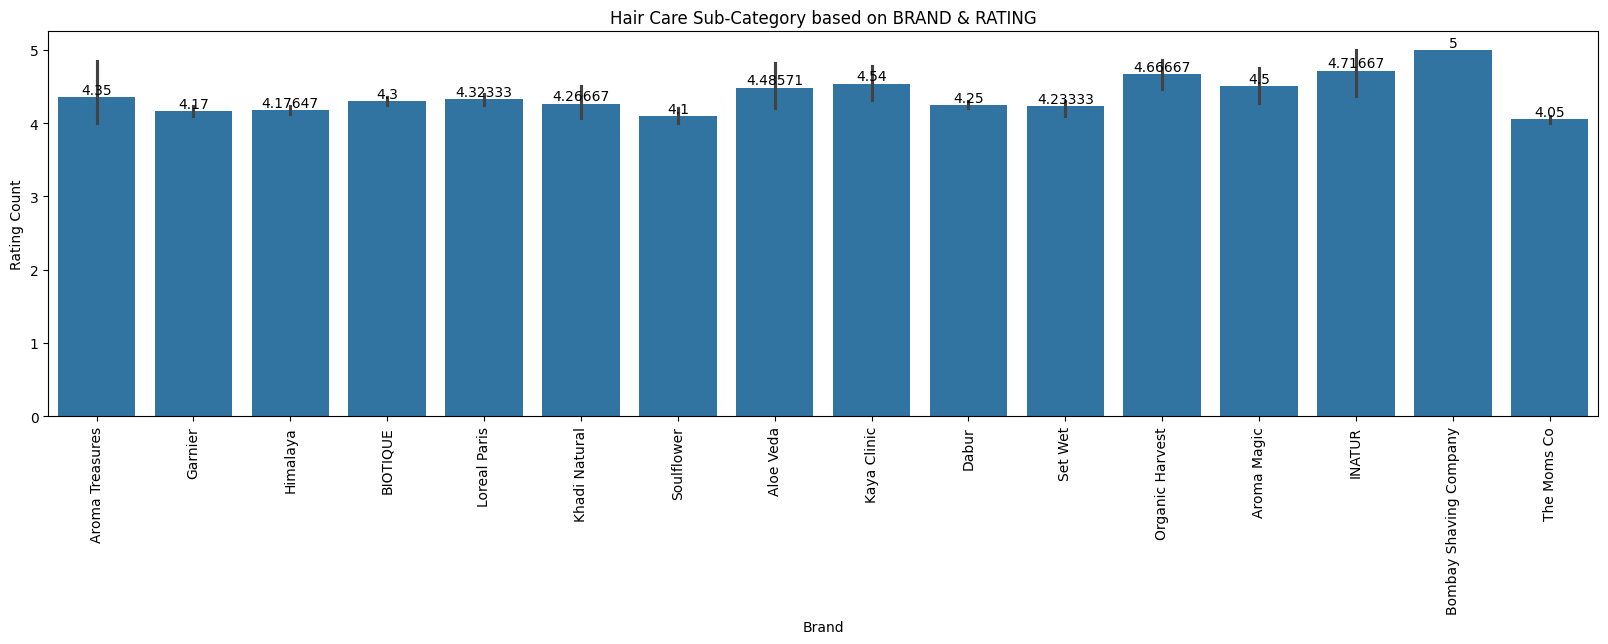

In [ ]:
filter_4 = df[(df.sub_category == "Hair Care") & (df.rating >=4 ) & (df.brand != "Others")]

plt.figure(figsize=(20, 5))
ax = sns.barplot(data = filter_4, x="brand", y="rating")

plt.xticks(rotation = 90)
plt.ylabel("Rating Count")
plt.xlabel("Brand")
plt.title("Hair Care Sub-Category based on BRAND & RATING")

ax.bar_label(ax.containers[0], fontsize=10)

plt.show()

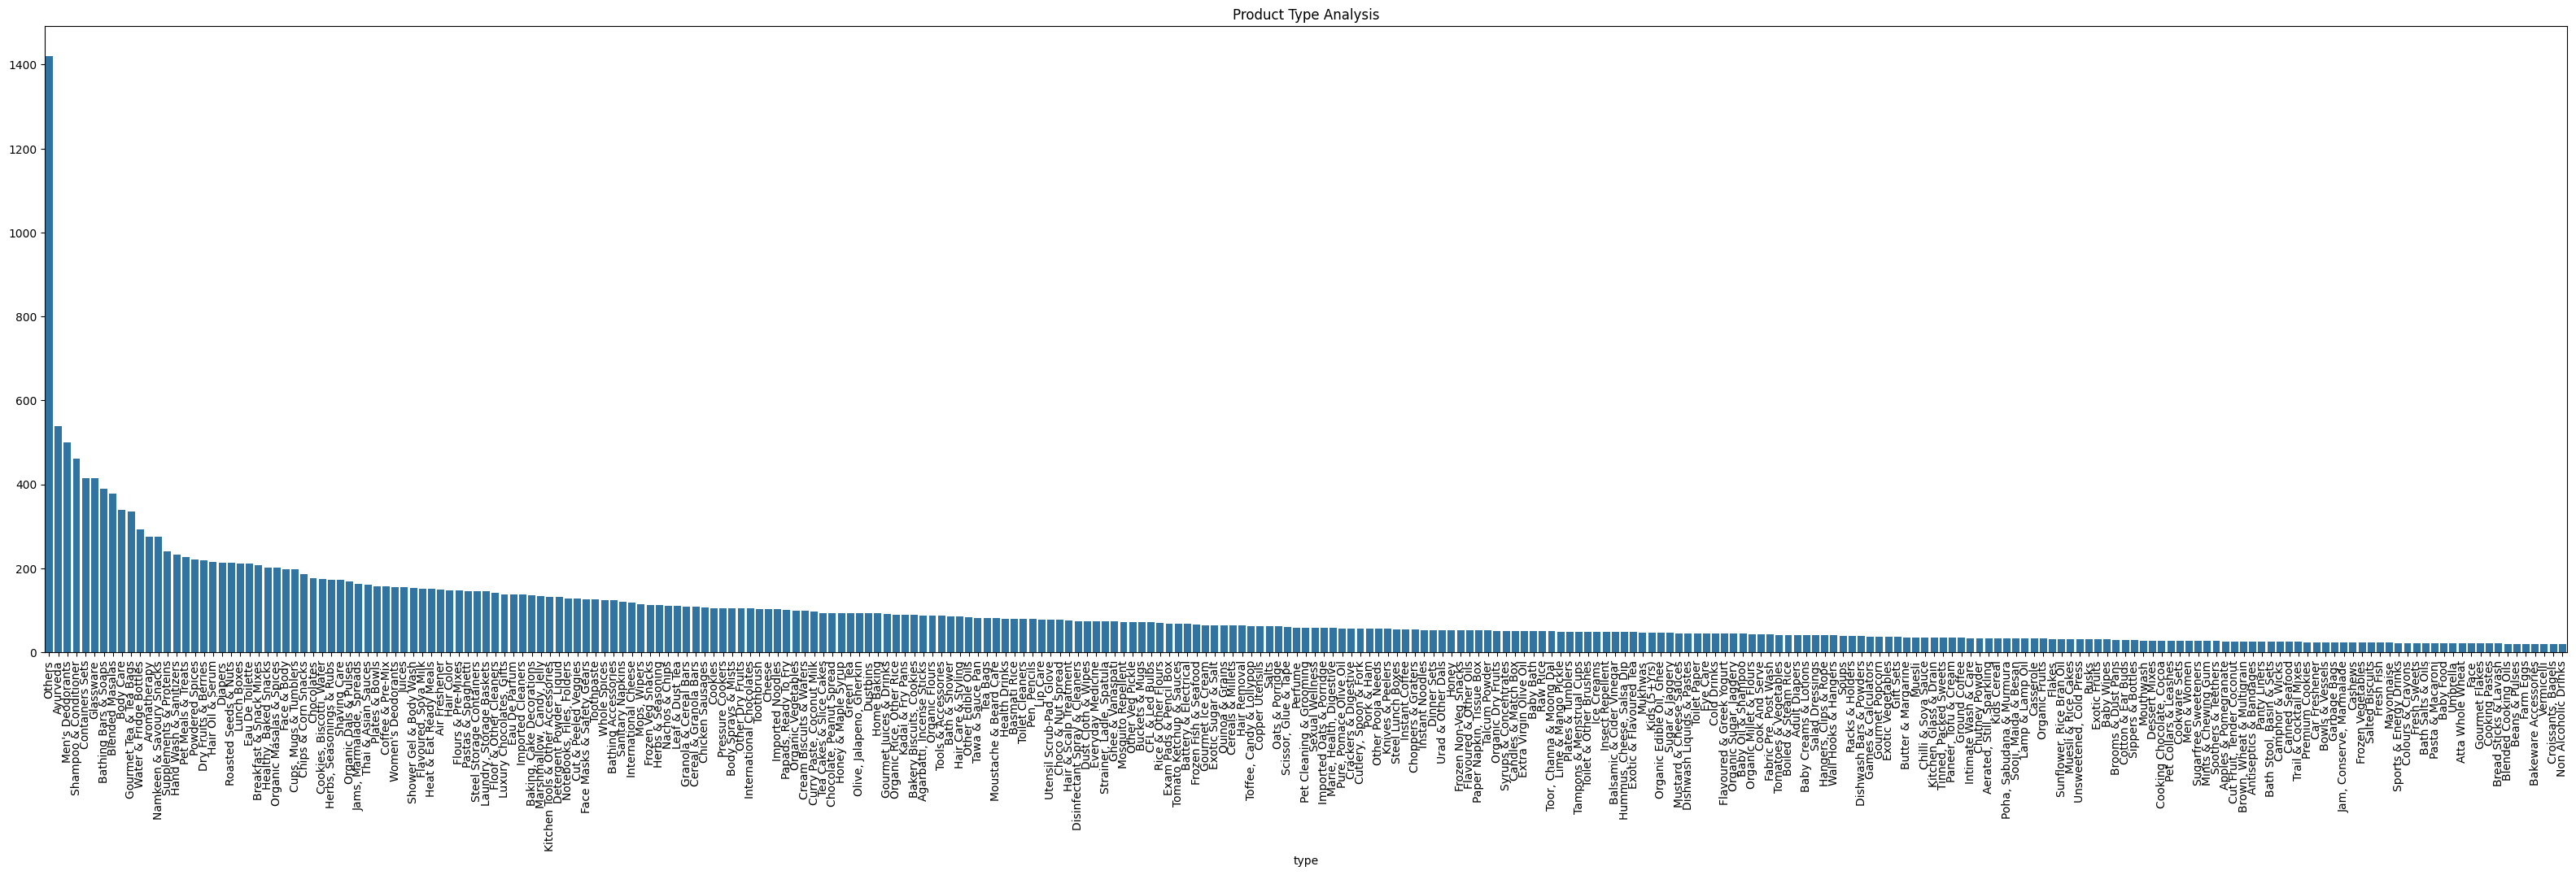

In [ ]:
pd.DataFrame(Type)
plt.figure(figsize = (40,10))
sns.barplot(x=Type.index, y=Type.values)
plt.xticks(rotation = 90)
plt.title("Product Type Analysis")
plt.show()

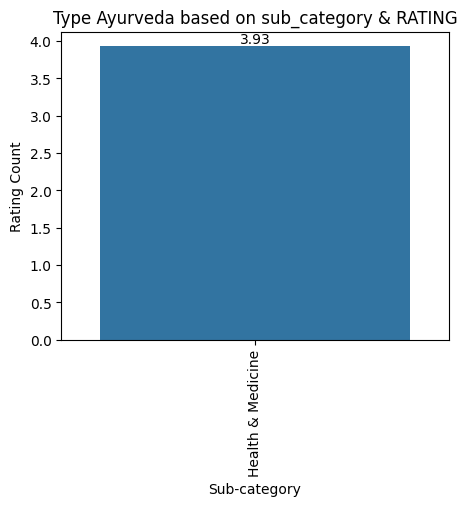

In [ ]:
filter_10 = df[(df.type == "Ayurveda")]

plt.figure(figsize = (5,4))
ax = sns.barplot(data = filter_10, x="sub_category", y="rating")

plt.xticks(rotation = 90)
plt.ylabel("Rating Count")
plt.xlabel("Sub-category")
plt.title("Type Ayurveda based on sub_category & RATING")

ax.bar_label(ax.containers[0], fontsize=10)

plt.show()

### 5

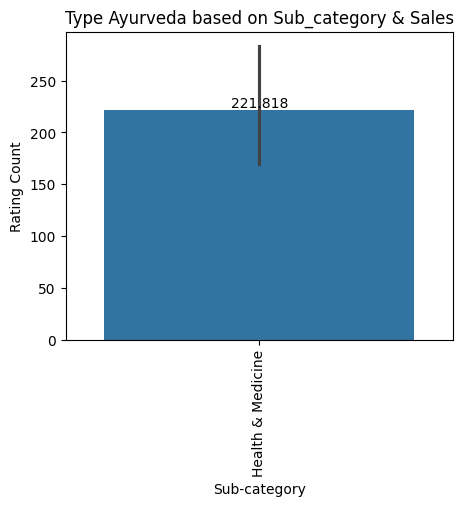

In [ ]:
filter_10 = df[(df.type == "Ayurveda")]

plt.figure(figsize = (5,4))
ax = sns.barplot(data = filter_10, x="sub_category", y="sale_price")

plt.xticks(rotation = 90)
plt.ylabel("Rating Count")
plt.xlabel("Sub-category")
plt.title("Type Ayurveda based on Sub_category & Sales")

ax.bar_label(ax.containers[0], fontsize=10)

plt.show()

### Top Products Type in which highest sales is done  : 1) Ayurveda

### Under Ayurveda type - Both Sub_category shows good rating  but sales of Skin Care product is more.

### CUSTOMER FEEDBACK ANALYSIS

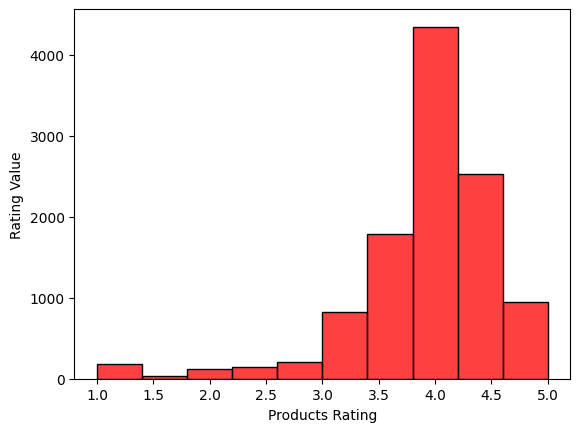

In [ ]:
sns.histplot(df.rating, bins =10, color="red")
plt.xlabel("Products Rating")
plt.ylabel("Rating Value")
plt.show()

<Axes: xlabel='rating'>

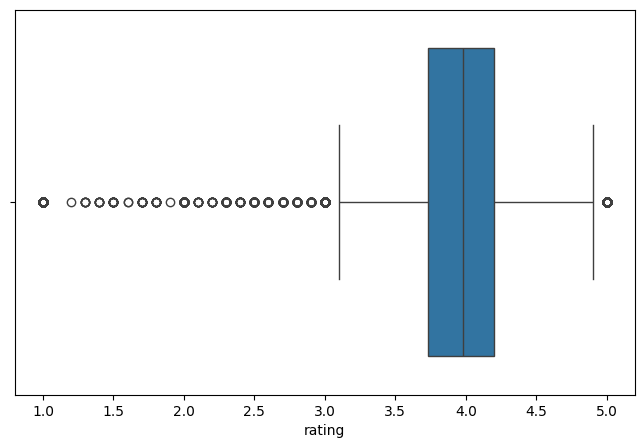

In [ ]:
plt.figure(figsize = (8,5))
sns.boxplot(x=df.rating)

### By plotting Histogram & Boxplot I can see, Highest product ratings are between 3.8 to 4.5

### Categories like Baby Care , Kitchen, Garden & Pets, Beauty & Hygiene have high sales price & Market Price.

### After analysing the trend of discount between different categories of product, I can say that:
### Categories like Fruits & Vegetables, Kitchen, Garden & Pets, Beauty & Hygiene have high and repeated sales because discount are high on these products.

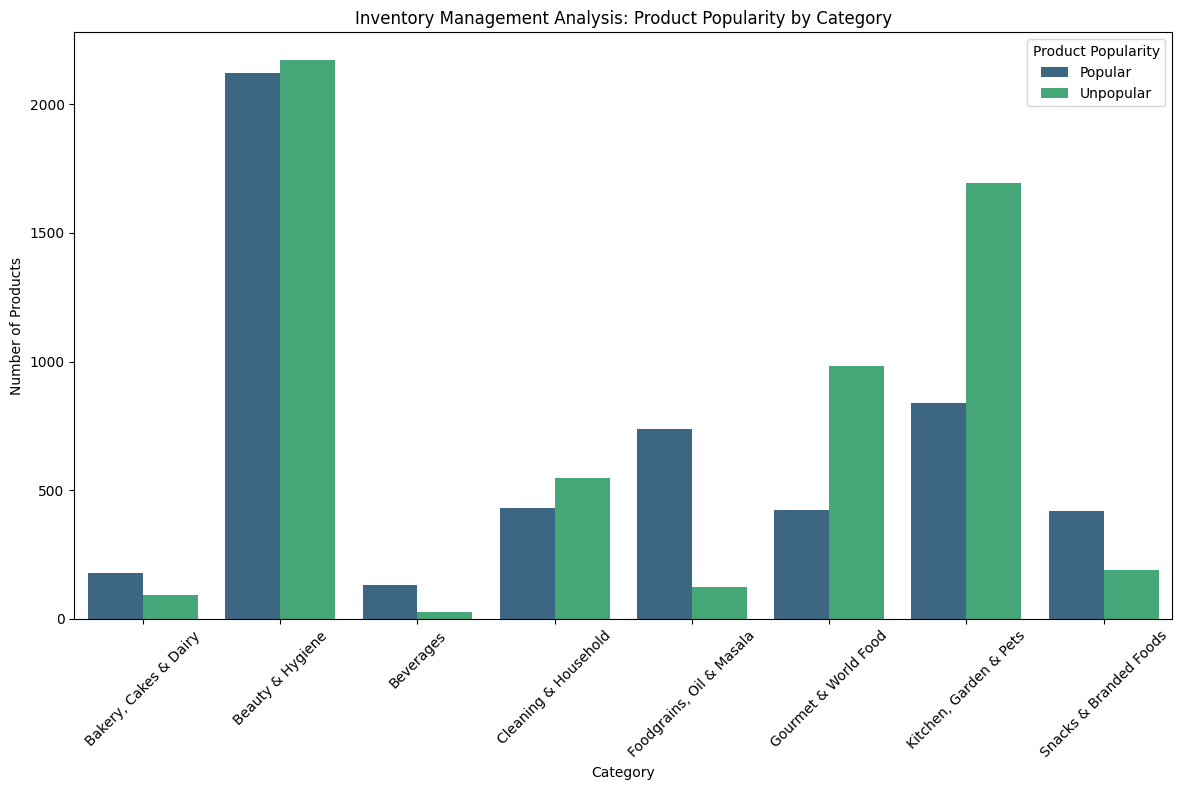

In [ ]:
data =df.copy()
# Create a new column to indicate product popularity.
# Here we assume that a rating of 4 or above indicates a popular product.
# Adjust this threshold based on your own business insights.
data["product_popularity"] = data["rating"].apply(
    lambda r: "Popular" if r >= 4 else "Unpopular")

# Group the data by category and popularity label.
# This groups products to see, for each category, how many are considered "Popular"
# (which might run out quickly) vs "Unpopular" (which might be overstocked).
popularity_counts = data.groupby(
    ["category", "product_popularity"]).size().reset_index(name="counts")

# Plot a bar chart that shows the count of popular and unpopular products per category.
plt.figure(figsize=(12, 8))
chart = sns.barplot(x="category", y="counts", hue="product_popularity",
                    data=popularity_counts, palette="viridis")

# Rotate the x-axis labels for better readability.
plt.xticks(rotation=45)
plt.title("Inventory Management Analysis: Product Popularity by Category")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.legend(title="Product Popularity")
plt.tight_layout()

# Display the chart
plt.show()



<ipython-input-2134-8580c0813008>:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Figure size 1200x800 with 0 Axes>

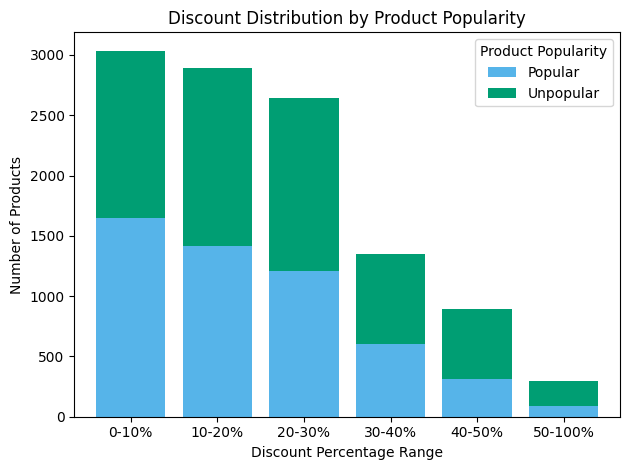

In [ ]:

data["product_popularity"] = data["rating"].apply(
    lambda r: "Popular" if r >= 4 else "Unpopular")

# Create discount bins to group discount percentages
# you can adjust these bins based on your data distribution
bins = [0, 10, 20, 30, 40, 50, 100]
labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-100%']

# Cut the Discount data into bins. This creates a new column with the discount range.
data["discount_bin"] = pd.cut(
    data["Discount"], bins=bins, labels=labels, include_lowest=True)

# Group the data by discount_bin and product_popularity, then count the number of products in each group.
discount_counts = data.groupby(
    ['discount_bin', 'product_popularity']).size().unstack(fill_value=0)

# Plot a stacked bar chart.
plt.figure(figsize=(12, 8))
discount_counts.plot(kind='bar', stacked=True, color=[
                     "#56b4e9", "#009e73"], width=0.8)

# Adding chart elements
plt.title("Discount Distribution by Product Popularity")
plt.xlabel("Discount Percentage Range")
plt.ylabel("Number of Products")
plt.legend(title="Product Popularity")
plt.xticks(rotation=0)
plt.tight_layout()

# Display the chart
plt.show()

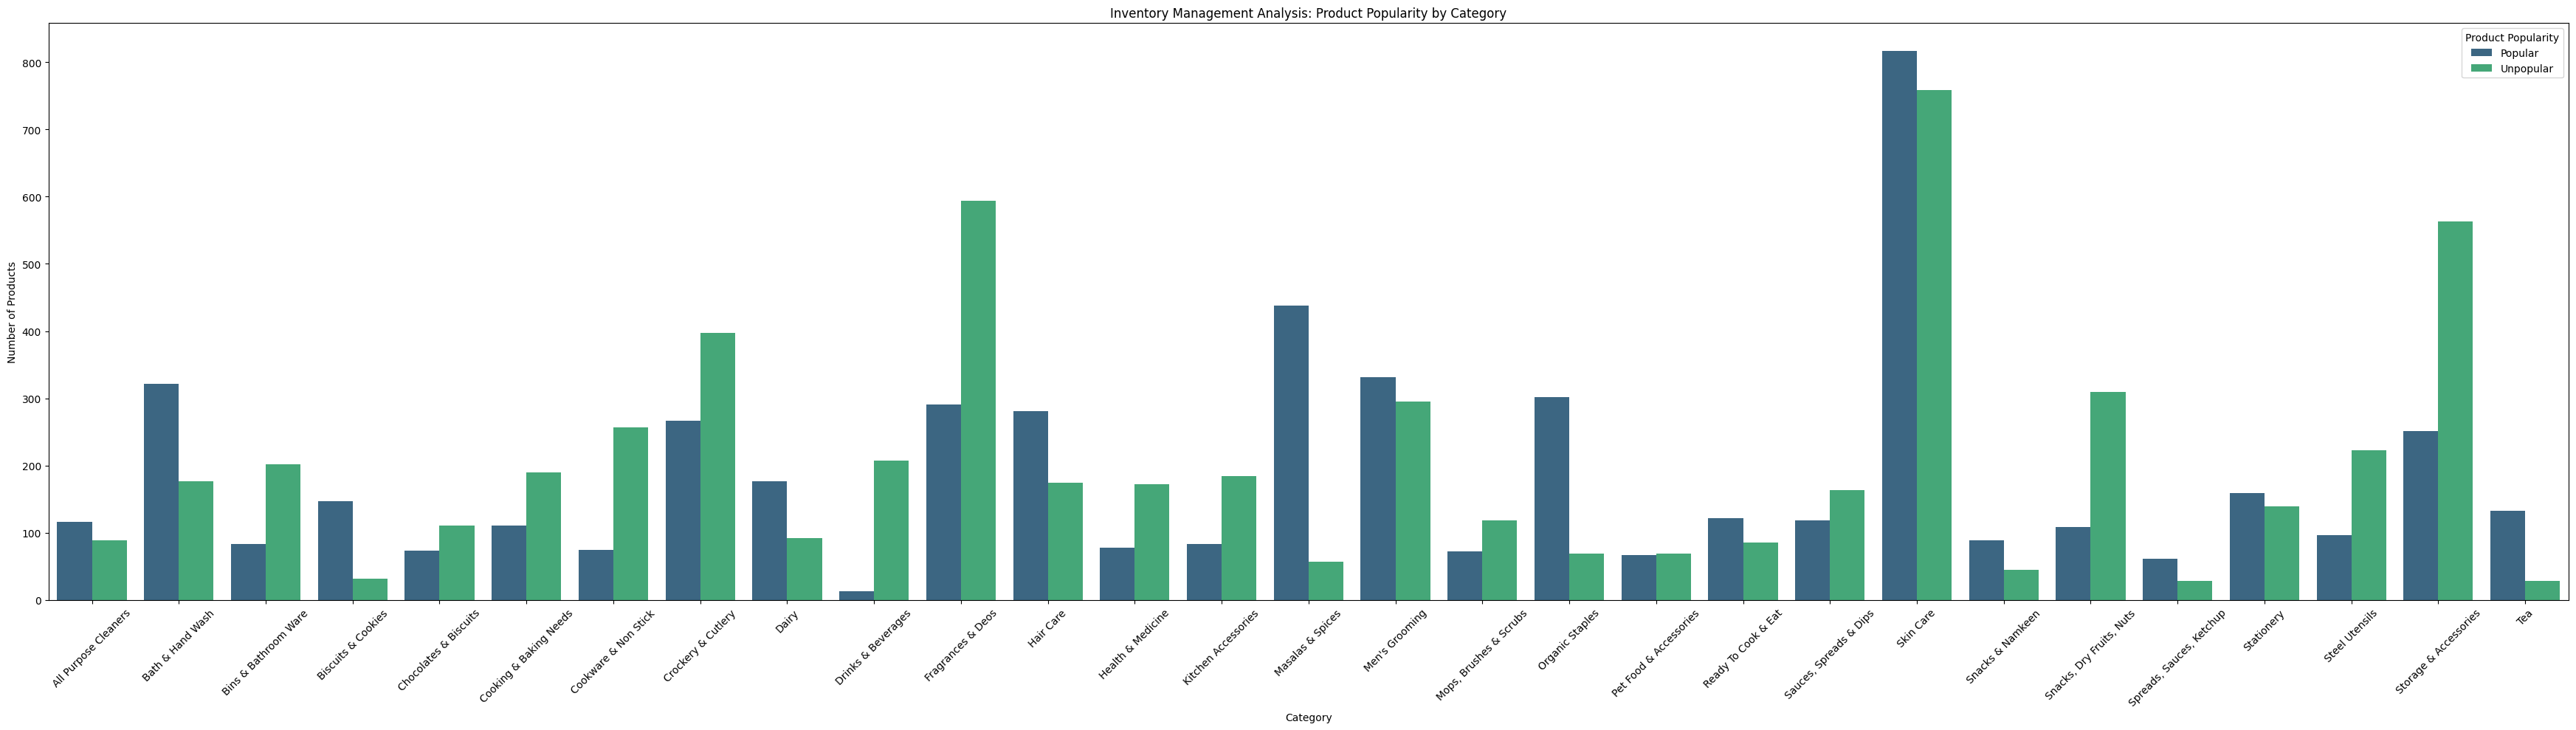

In [ ]:
# Create a new column to indicate product popularity.
# Here we assume that a rating of 4 or above indicates a popular product.
# Adjust this threshold based on your own business insights.
data["product_popularity"] = data["rating"].apply(
    lambda r: "Popular" if r >= 4 else "Unpopular")

# Group the data by category and popularity label.
# This groups products to see, for each category, how many are considered "Popular"
# (which might run out quickly) vs "Unpopular" (which might be overstocked).
popularity_counts = data.groupby(
    ["sub_category", "product_popularity"]).size().reset_index(name="counts")

# Plot a bar chart that shows the count of popular and unpopular products per category.
plt.figure(figsize=(35, 10))
chart = sns.barplot(x="sub_category", y="counts", hue="product_popularity",
                    data=popularity_counts, palette="viridis")

# Rotate the x-axis labels for better readability.
plt.xticks(rotation=45)
plt.title("Inventory Management Analysis: Product Popularity by Category")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.legend(title="Product Popularity")
plt.tight_layout()

# Display the chart
plt.show()

<ipython-input-2136-30adce85669f>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




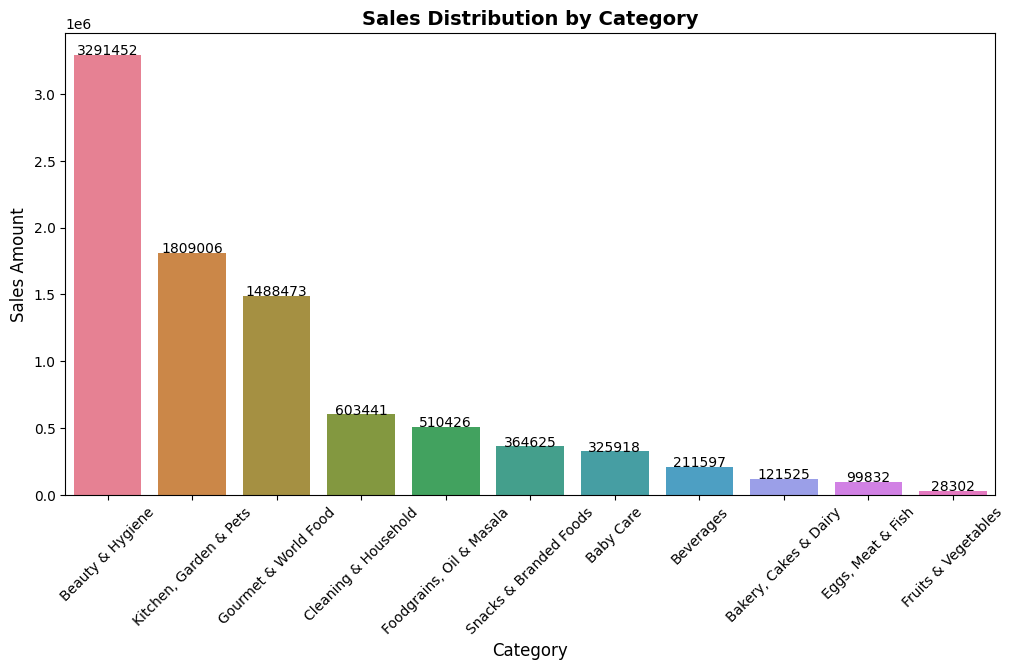

In [ ]:
# Bar chart for sales by category
plt.figure(figsize=(12, 6))
sns.barplot(x=category_sales.index, y=category_sales, palette="husl")
plt.xlabel("Category", fontsize=12)
plt.ylabel("Sales Amount", fontsize=12)
plt.xticks(rotation=45)
plt.title("Sales Distribution by Category", fontsize=14, weight="bold")

# Add labels on bars
for i, v in enumerate(category_sales):
    plt.text(i, v + 500, f"{v:.0f}", ha="center", fontsize=10)

plt.show()

<ipython-input-2137-1b0acd78fb68>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




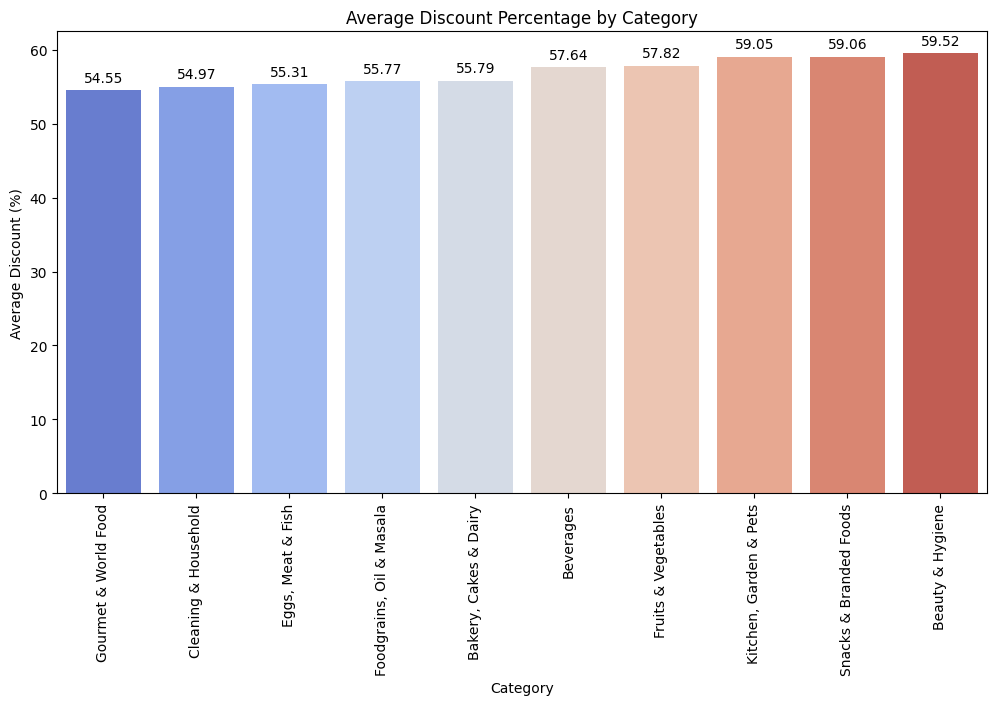

In [ ]:
plt.figure(figsize=(12, 6))
category_discount = discounted_products.groupby(
    "category")["Discount"].mean().sort_values()
ax = sns.barplot(x=category_discount.index,
                 y=category_discount.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Average Discount Percentage by Category")
plt.xlabel("Category")
plt.ylabel("Average Discount (%)")

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),  # Distance from the bar to the label
                textcoords='offset points')

plt.show()

<ipython-input-2138-a38f5efd853c>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




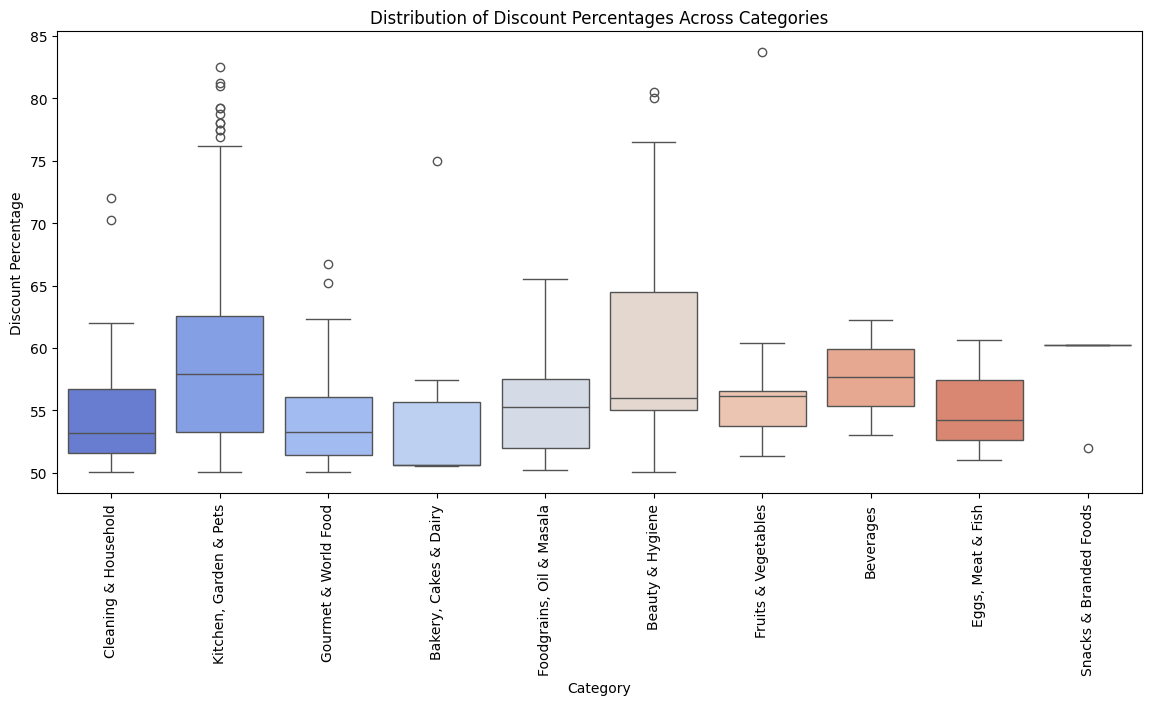

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=discounted_products, x="category",
            y="Discount", palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Distribution of Discount Percentages Across Categories")
plt.xlabel("Category")
plt.ylabel("Discount Percentage")
plt.show()

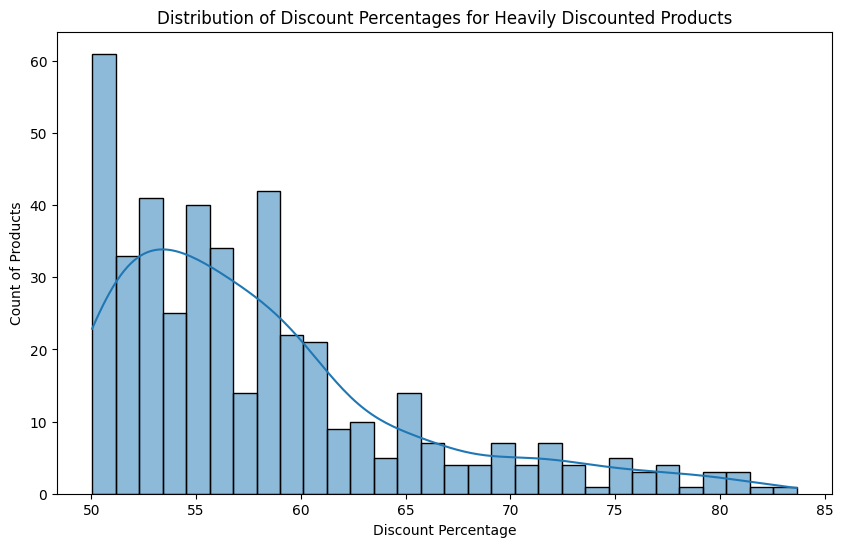

In [ ]:
# Plot 2: Distribution of Discount Percentages
plt.figure(figsize=(10, 6))
sns.histplot(discounted_products["Discount"], bins=30, kde=True)
plt.title("Distribution of Discount Percentages for Heavily Discounted Products")
plt.xlabel("Discount Percentage")
plt.ylabel("Count of Products")
plt.show()

Analysis: Overpriced Products with Heavy Discounts
Market Price vs. Discount Percentage (Scatter Plot)

Products with higher market prices often have steep discounts.
Some extreme cases where the discount exceeds 80%, indicating potential pricing issues.
Distribution of Discount Percentages (Histogram)

A significant number of products have discounts above 50%, suggesting possible overpricing strategies to attract customers.

<ipython-input-2140-43370bfcb4f0>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




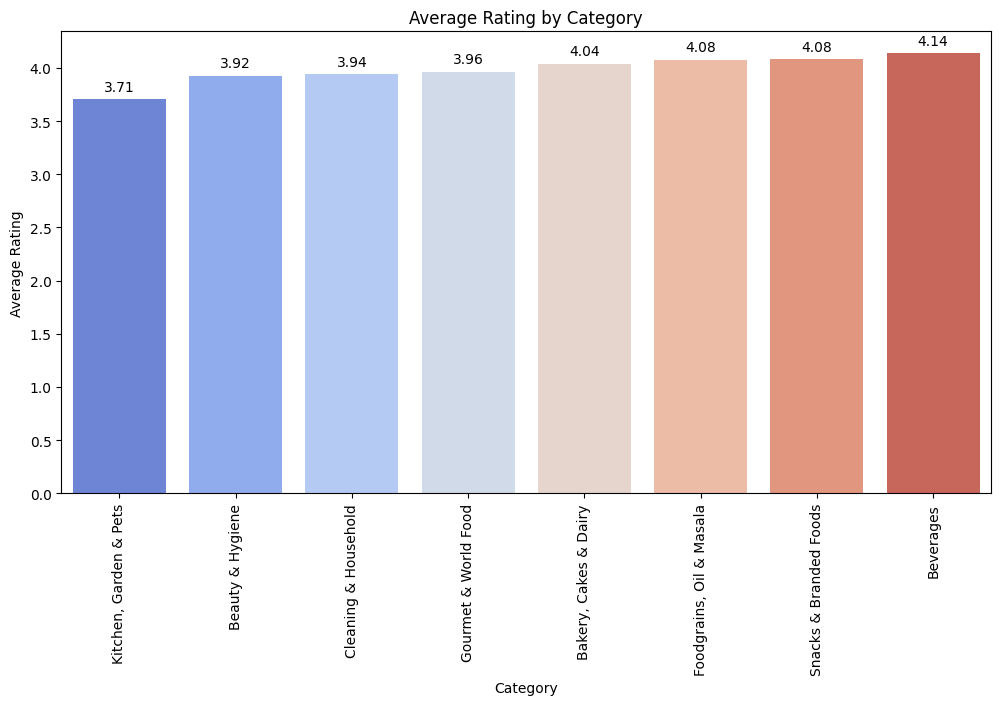

In [ ]:
# Filter low-rated products (rating ≤ 2.5)
low_rated_products = df[df["rating"] <= 2.5]

# Plot 1: Average Rating by Category
plt.figure(figsize=(12, 6))
category_avg_rating = df.groupby(
    "category")["rating"].mean().sort_values()
ax = sns.barplot(x=category_avg_rating.index,
                 y=category_avg_rating.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Average Rating by Category")
plt.xlabel("Category")
plt.ylabel("Average Rating")

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),  # Distance from the bar to the label
                textcoords='offset points')

plt.show()

Analysis: Low-Rated Products in Key Categories
Average Rating by Category (Bar Chart)

Some categories have consistently lower ratings, indicating quality issues or mismatched customer expectations.
Categories with an average rating close to 3 or below should be further examined.
Count of Low-Rated Products per Category (Bar Chart)

Some categories have a high number of products rated ≤2.5, highlighting areas that need improvement in quality or customer satisfaction.

<ipython-input-2141-343078b1b52a>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




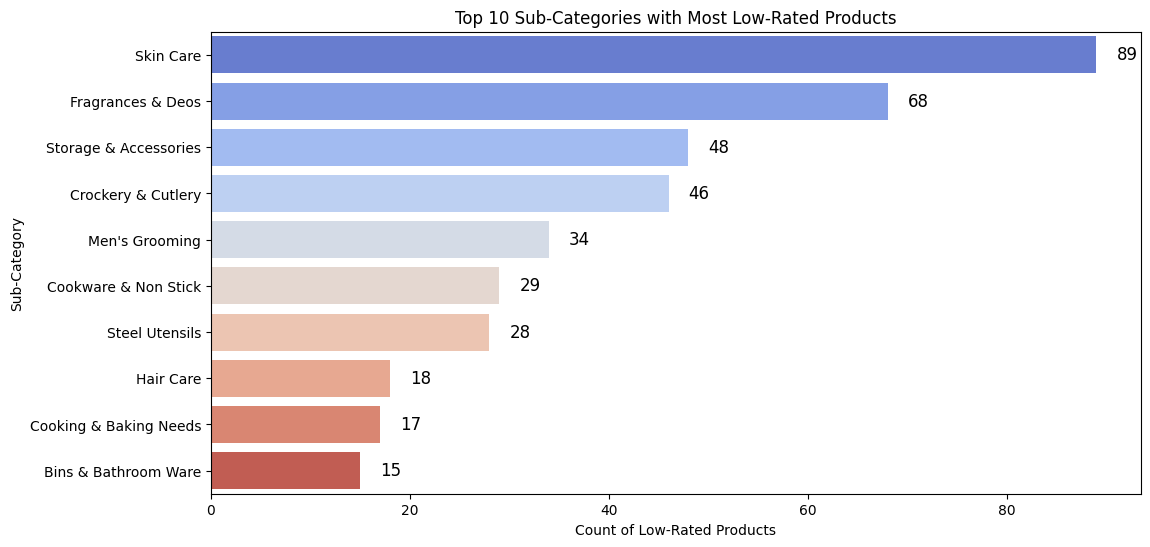

In [ ]:

# 4. Sub-Categories with Most Low-Rated Products
plt.figure(figsize=(12, 6))
filtered_low_rated = low_rated_products[low_rated_products["sub_category"] != "Others"]
low_rated_subcategories = filtered_low_rated["sub_category"].value_counts().head(
    10)
sns.barplot(x=low_rated_subcategories.values,
            y=low_rated_subcategories.index, palette="coolwarm")
plt.title("Top 10 Sub-Categories with Most Low-Rated Products")
plt.xlabel("Count of Low-Rated Products")
plt.ylabel("Sub-Category")
for index, value in enumerate(low_rated_subcategories.values):
    plt.text(value + 2, index, str(value), va='center', fontsize=12)
plt.show()

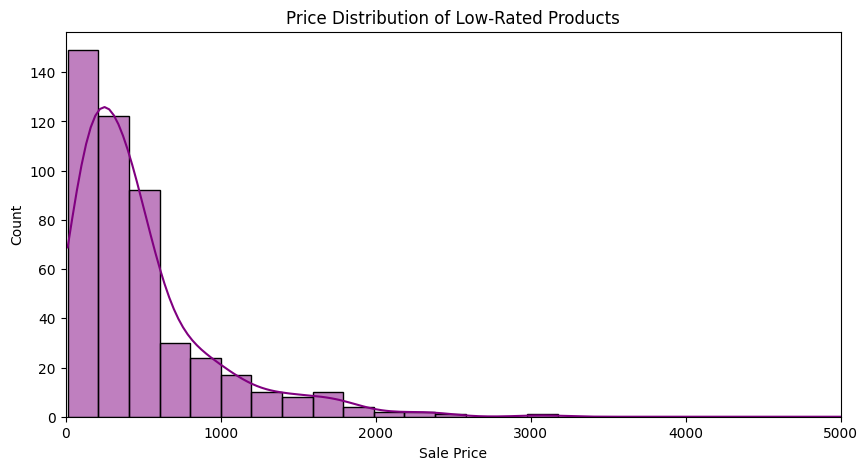

<ipython-input-2142-63d0007f25b8>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




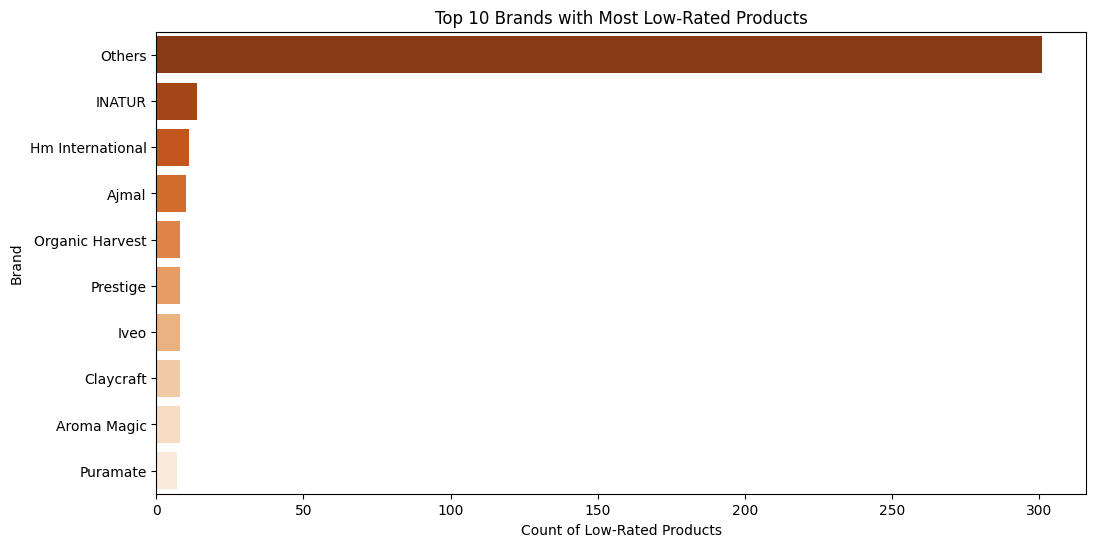

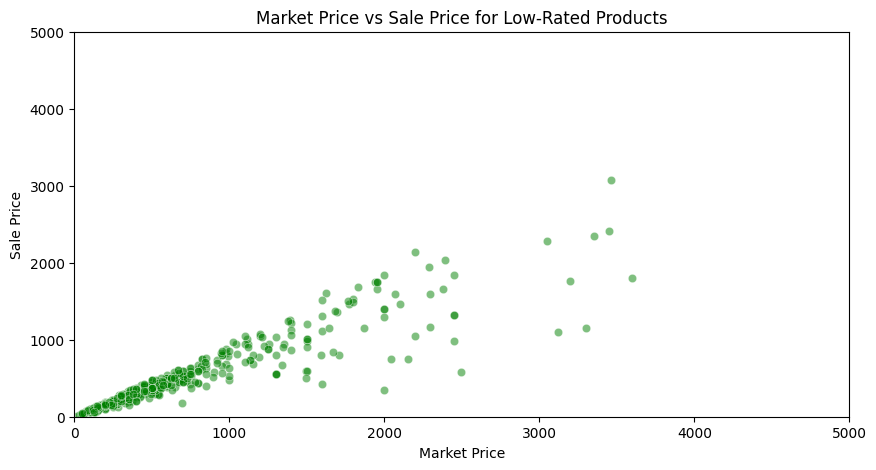

<ipython-input-2142-63d0007f25b8>:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




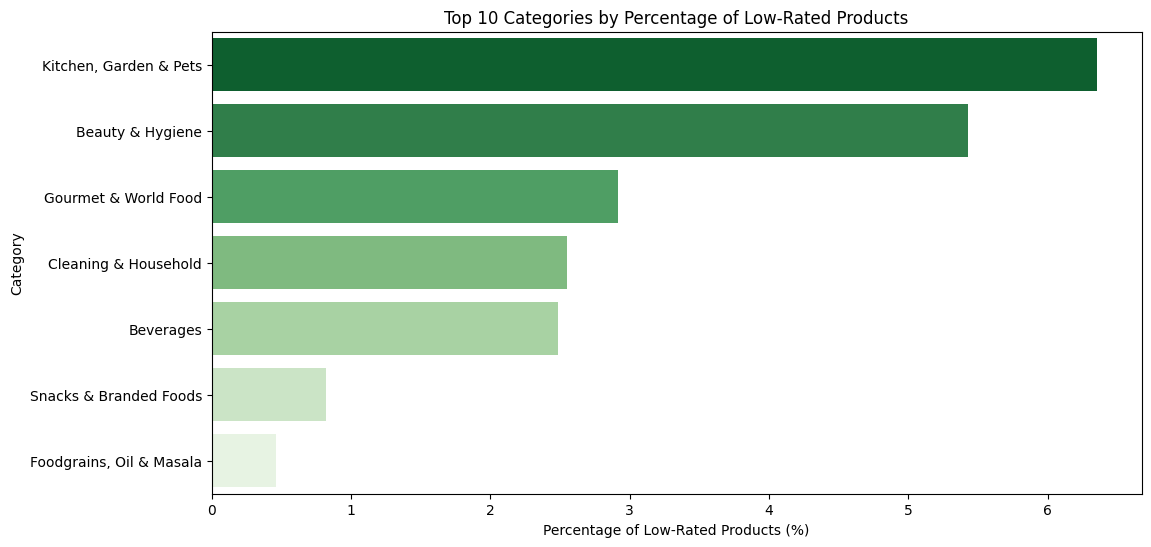

In [ ]:

# 5. Price Distribution of Low-Rated Products
plt.figure(figsize=(10, 5))
sns.histplot(low_rated_products["sale_price"],
             bins=30, kde=True, color="purple")
plt.title("Price Distribution of Low-Rated Products")
plt.xlabel("Sale Price")
plt.ylabel("Count")
plt.xlim(0, 5000)  # Limiting to a reasonable range
plt.show()

# 6. Brands with Most Low-Rated Products
plt.figure(figsize=(12, 6))
low_rated_brands = low_rated_products["brand"].value_counts().head(10)
sns.barplot(x=low_rated_brands.values,
            y=low_rated_brands.index, palette="Oranges_r")
plt.title("Top 10 Brands with Most Low-Rated Products")
plt.xlabel("Count of Low-Rated Products")
plt.ylabel("Brand")
plt.show()

# 7. Market Price vs Sale Price for Low-Rated Products
plt.figure(figsize=(10, 5))
sns.scatterplot(x=low_rated_products["market_price"],
                y=low_rated_products["sale_price"], alpha=0.5, color="green")
plt.title("Market Price vs Sale Price for Low-Rated Products")
plt.xlabel("Market Price")
plt.ylabel("Sale Price")
plt.xlim(0, 5000)
plt.ylim(0, 5000)
plt.show()

# 8. Percentage of Low-Rated Products in Each Category
plt.figure(figsize=(12, 6))
category_total = df["category"].value_counts()
low_rated_percentage = (low_rated_products["category"].value_counts(
) / category_total * 100).dropna().sort_values(ascending=False).head(10)
sns.barplot(x=low_rated_percentage.values,
            y=low_rated_percentage.index, palette="Greens_r")
plt.title("Top 10 Categories by Percentage of Low-Rated Products")
plt.xlabel("Percentage of Low-Rated Products (%)")
plt.ylabel("Category")
plt.show()

##### High Discounts vs. Low Ratings – Do heavily discounted products also have poor ratings?
##### Price Distribution Across Categories – Identifying pricing anomalies per category.
##### Brand Performance – Which brands have the most low-rated or heavily discounted products?
##### Let's start with High Discounts vs. Low Ratings.

### THANK YOU